# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
from dython.nominal import associations
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import math 
#We will use sklearn for building logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
import scikitplot as skplt
import scipy.stats as stats
from sklearn.metrics import log_loss
import scipy
from scipy.stats import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFECV

In [2]:
file = pd.read_excel('D:/Pilot/data/Loan_Default_Dataset/RawData.xlsx')
file.head()

,Id,Age,Annual Income,Home Ownership,Employment Length (in years),Loan Intent,Loan Grade,Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income,Historical Default,Credit History Length
0,1,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,2,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,3,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,4,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,5,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# EDA - Exploratory Data Analysis (to understand what the model included)

Getting insights from data and visualizing them

In [3]:
file.shape

(32581, 13)

In [4]:
file.describe()

,Id,Age,Annual Income,Employment Length (in years),Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income,Credit History Length
count,32581.000000,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,16291.000000,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,9405.468897,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,1.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,8146.000000,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,16291.000000,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,24436.000000,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,32581.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [5]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Id                                           32581 non-null  int64  
 1   Age                                          32581 non-null  int64  
 2   Annual Income                                32581 non-null  int64  
 3   Home Ownership                               32581 non-null  object 
 4   Employment Length (in years)                 31686 non-null  float64
 5   Loan Intent                                  32581 non-null  object 
 6   Loan Grade                                   32581 non-null  object 
 7   Loan Amount                                  32581 non-null  int64  
 8   Interest Rate                                29465 non-null  float64
 9   Loan Status (0 is non default 1 is default)  32581 non-null  int64  
 10

# Missing Values / No of Null / No of Zeros

In [6]:
# Count number of zeros in all columns of Dataframe
for column_name in file.columns:
    column = file[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column', column_name, 'is: ', count)

Count of zeros in column Id is:  0
Count of zeros in column Age is:  0
Count of zeros in column Annual Income is:  0
Count of zeros in column Home Ownership is:  0
Count of zeros in column Employment Length (in years) is:  4105
Count of zeros in column Loan Intent is:  0
Count of zeros in column Loan Grade is:  0
Count of zeros in column Loan Amount is:  0
Count of zeros in column Interest Rate is:  0
Count of zeros in column Loan Status (0 is non default 1 is default) is:  25473
Count of zeros in column Percent Income is:  9
Count of zeros in column Historical Default is:  0
Count of zeros in column Credit History Length is:  0


In [7]:
file.isnull().sum()

Id                                                0
Age                                               0
Annual Income                                     0
Home Ownership                                    0
Employment Length (in years)                    895
Loan Intent                                       0
Loan Grade                                        0
Loan Amount                                       0
Interest Rate                                  3116
Loan Status (0 is non default 1 is default)       0
Percent Income                                    0
Historical Default                                0
Credit History Length                             0
dtype: int64

# Handling Missing Data

In [8]:
#Employement length replace null as mean 
#but since Employment Length using in years, we need int only 
mean = 4.789686
file['Employment Length (in years)'] = file['Employment Length (in years)'].replace(np.nan, round(mean))
  
file.isnull().sum()

Id                                                0
Age                                               0
Annual Income                                     0
Home Ownership                                    0
Employment Length (in years)                      0
Loan Intent                                       0
Loan Grade                                        0
Loan Amount                                       0
Interest Rate                                  3116
Loan Status (0 is non default 1 is default)       0
Percent Income                                    0
Historical Default                                0
Credit History Length                             0
dtype: int64

In [9]:
#Interest rate drop those null value 
file = file.dropna()
file.isnull().sum()

Id                                             0
Age                                            0
Annual Income                                  0
Home Ownership                                 0
Employment Length (in years)                   0
Loan Intent                                    0
Loan Grade                                     0
Loan Amount                                    0
Interest Rate                                  0
Loan Status (0 is non default 1 is default)    0
Percent Income                                 0
Historical Default                             0
Credit History Length                          0
dtype: int64

In [10]:
file.shape

(29465, 13)

# Correlation

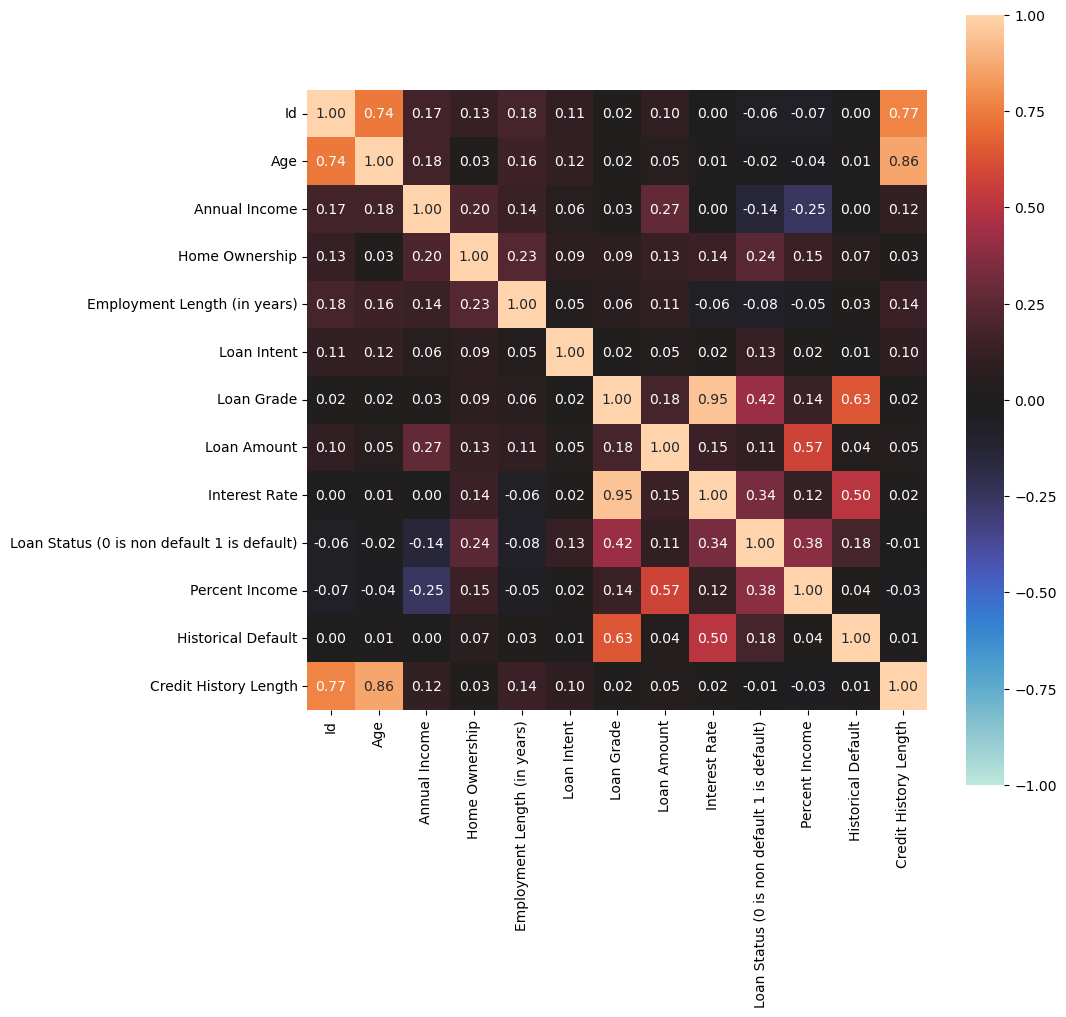

In [11]:
categorical_correlation= associations(file, filename= 'categorical_correlation.png', figsize=(10,10))

<AxesSubplot:>

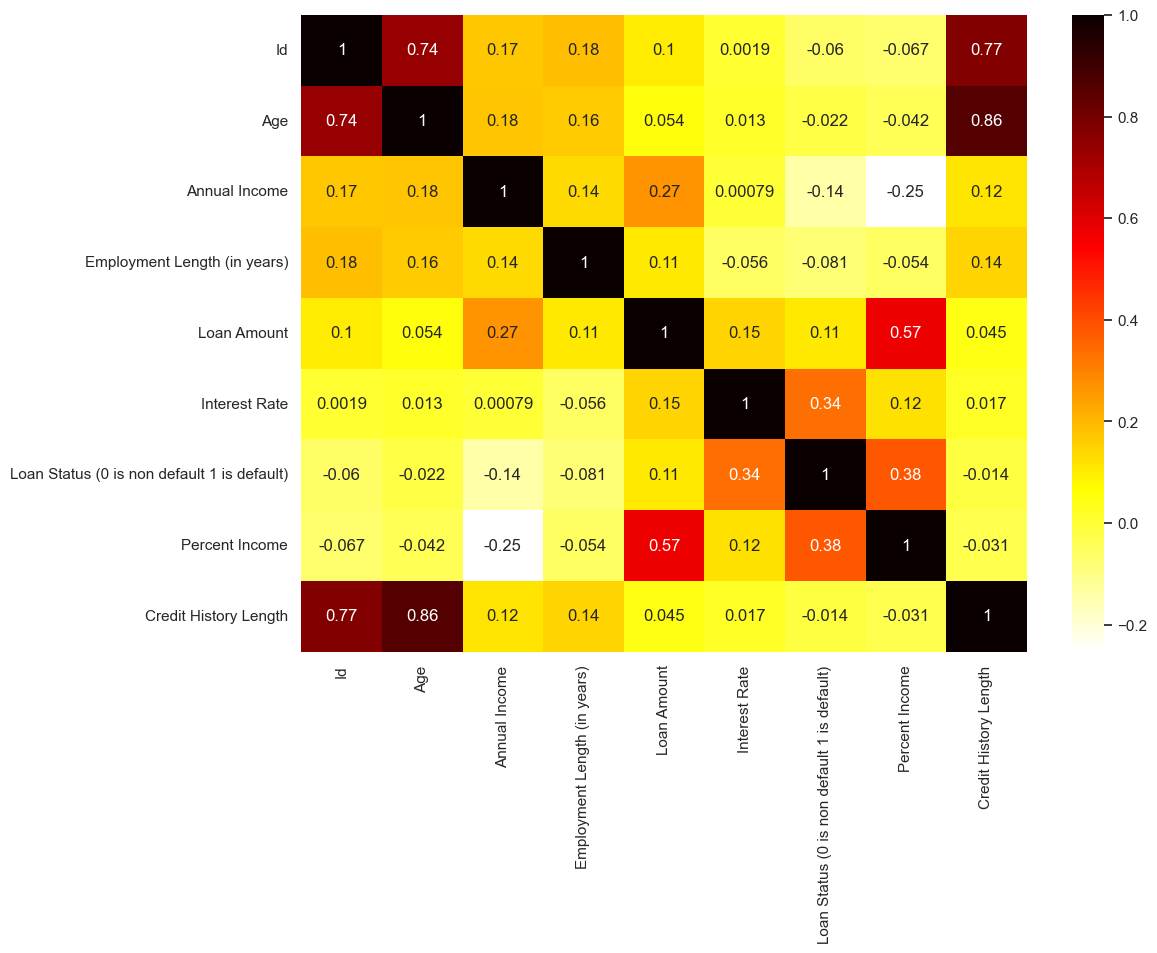

In [12]:
CorMatrix = file.corr()
#sns.set(font_scale=0.4)   # set the font scale at 0.7
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(CorMatrix, annot=True, cmap="hot_r", cbar=True)
#annot - will return the correlation values inside the matrix
#cmap - Color the show
#cbar - Show/hide the color bar

#remove credit history length

In [13]:
#remove credit history length 
file = file.drop('Credit History Length',axis=1)
file.shape

(29465, 12)

#  Target Variable’s Distribution

In [14]:
file['Loan Status (0 is non default 1 is default)'].value_counts(normalize=True)
# consider the target variable' class is balance 
# if 0 = 0.99 and 1= 0.01 => class is imbalance

0    0.780621
1    0.219379
Name: Loan Status (0 is non default 1 is default), dtype: float64

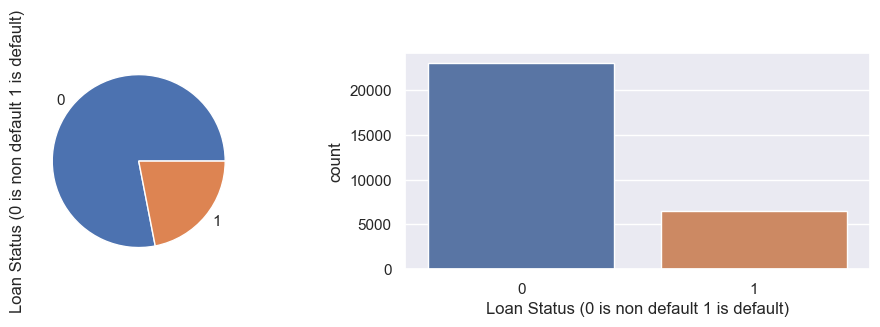

In [15]:
# chart for distribution of target variable
fig= plt.figure(figsize=(10,3) )

fig.add_subplot(1,2,1)
pieChart = file['Loan Status (0 is non default 1 is default)'].value_counts(normalize=True).plot.pie()

fig.add_subplot(1,2,2)
barChart = sns.countplot(x=file['Loan Status (0 is non default 1 is default)'])

plt.tight_layout()
plt.show()

# Data Visualization_Numerical (Bar Chart) (Normalization)

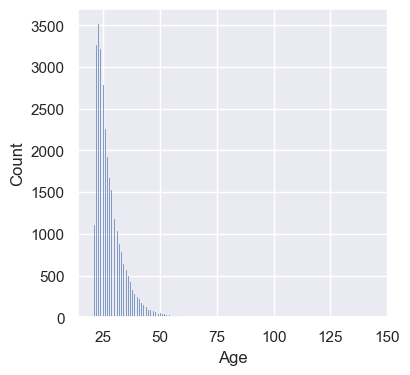

In [16]:
plt.figure(figsize=(4,4))
sns.histplot(x='Age', data=file, )
plt.show()

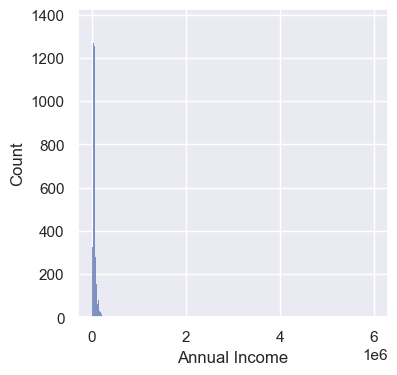

In [17]:
plt.figure(figsize=(4,4))
sns.histplot(x='Annual Income', data=file, )
plt.show()

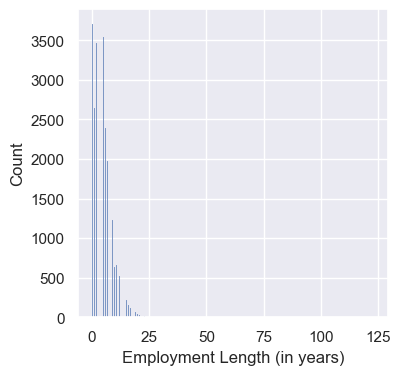

In [18]:
plt.figure(figsize=(4,4))
sns.histplot(x='Employment Length (in years)', data=file, )
plt.show()

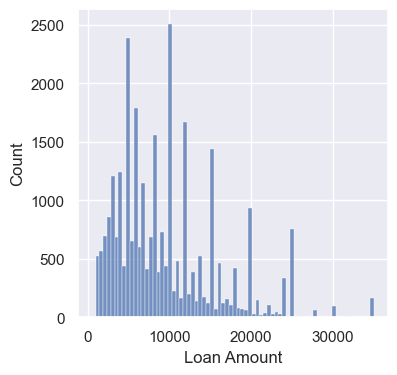

In [19]:
plt.figure(figsize=(4,4))
sns.histplot(x='Loan Amount', data=file, )
plt.show()

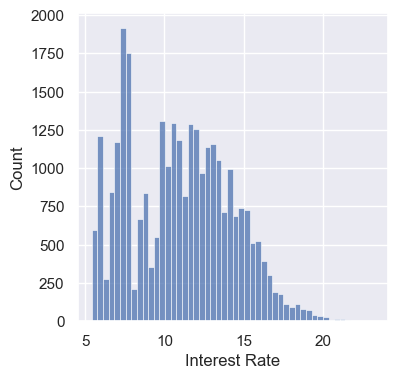

In [20]:
plt.figure(figsize=(4,4))
sns.histplot(x='Interest Rate', data=file, )
plt.show()

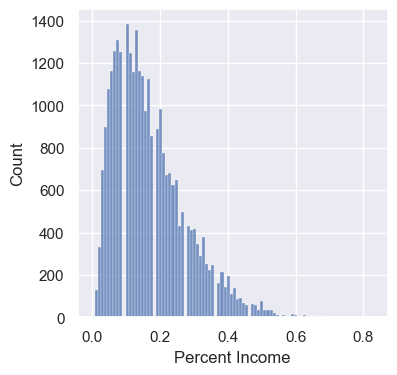

In [21]:
plt.figure(figsize=(4,4))
sns.histplot(x='Percent Income', data=file, )
plt.show()

In [22]:
#highly correlated to Age -> remove it
#sns.histplot(x='Credit History Length', data=file, )
#plt.show()

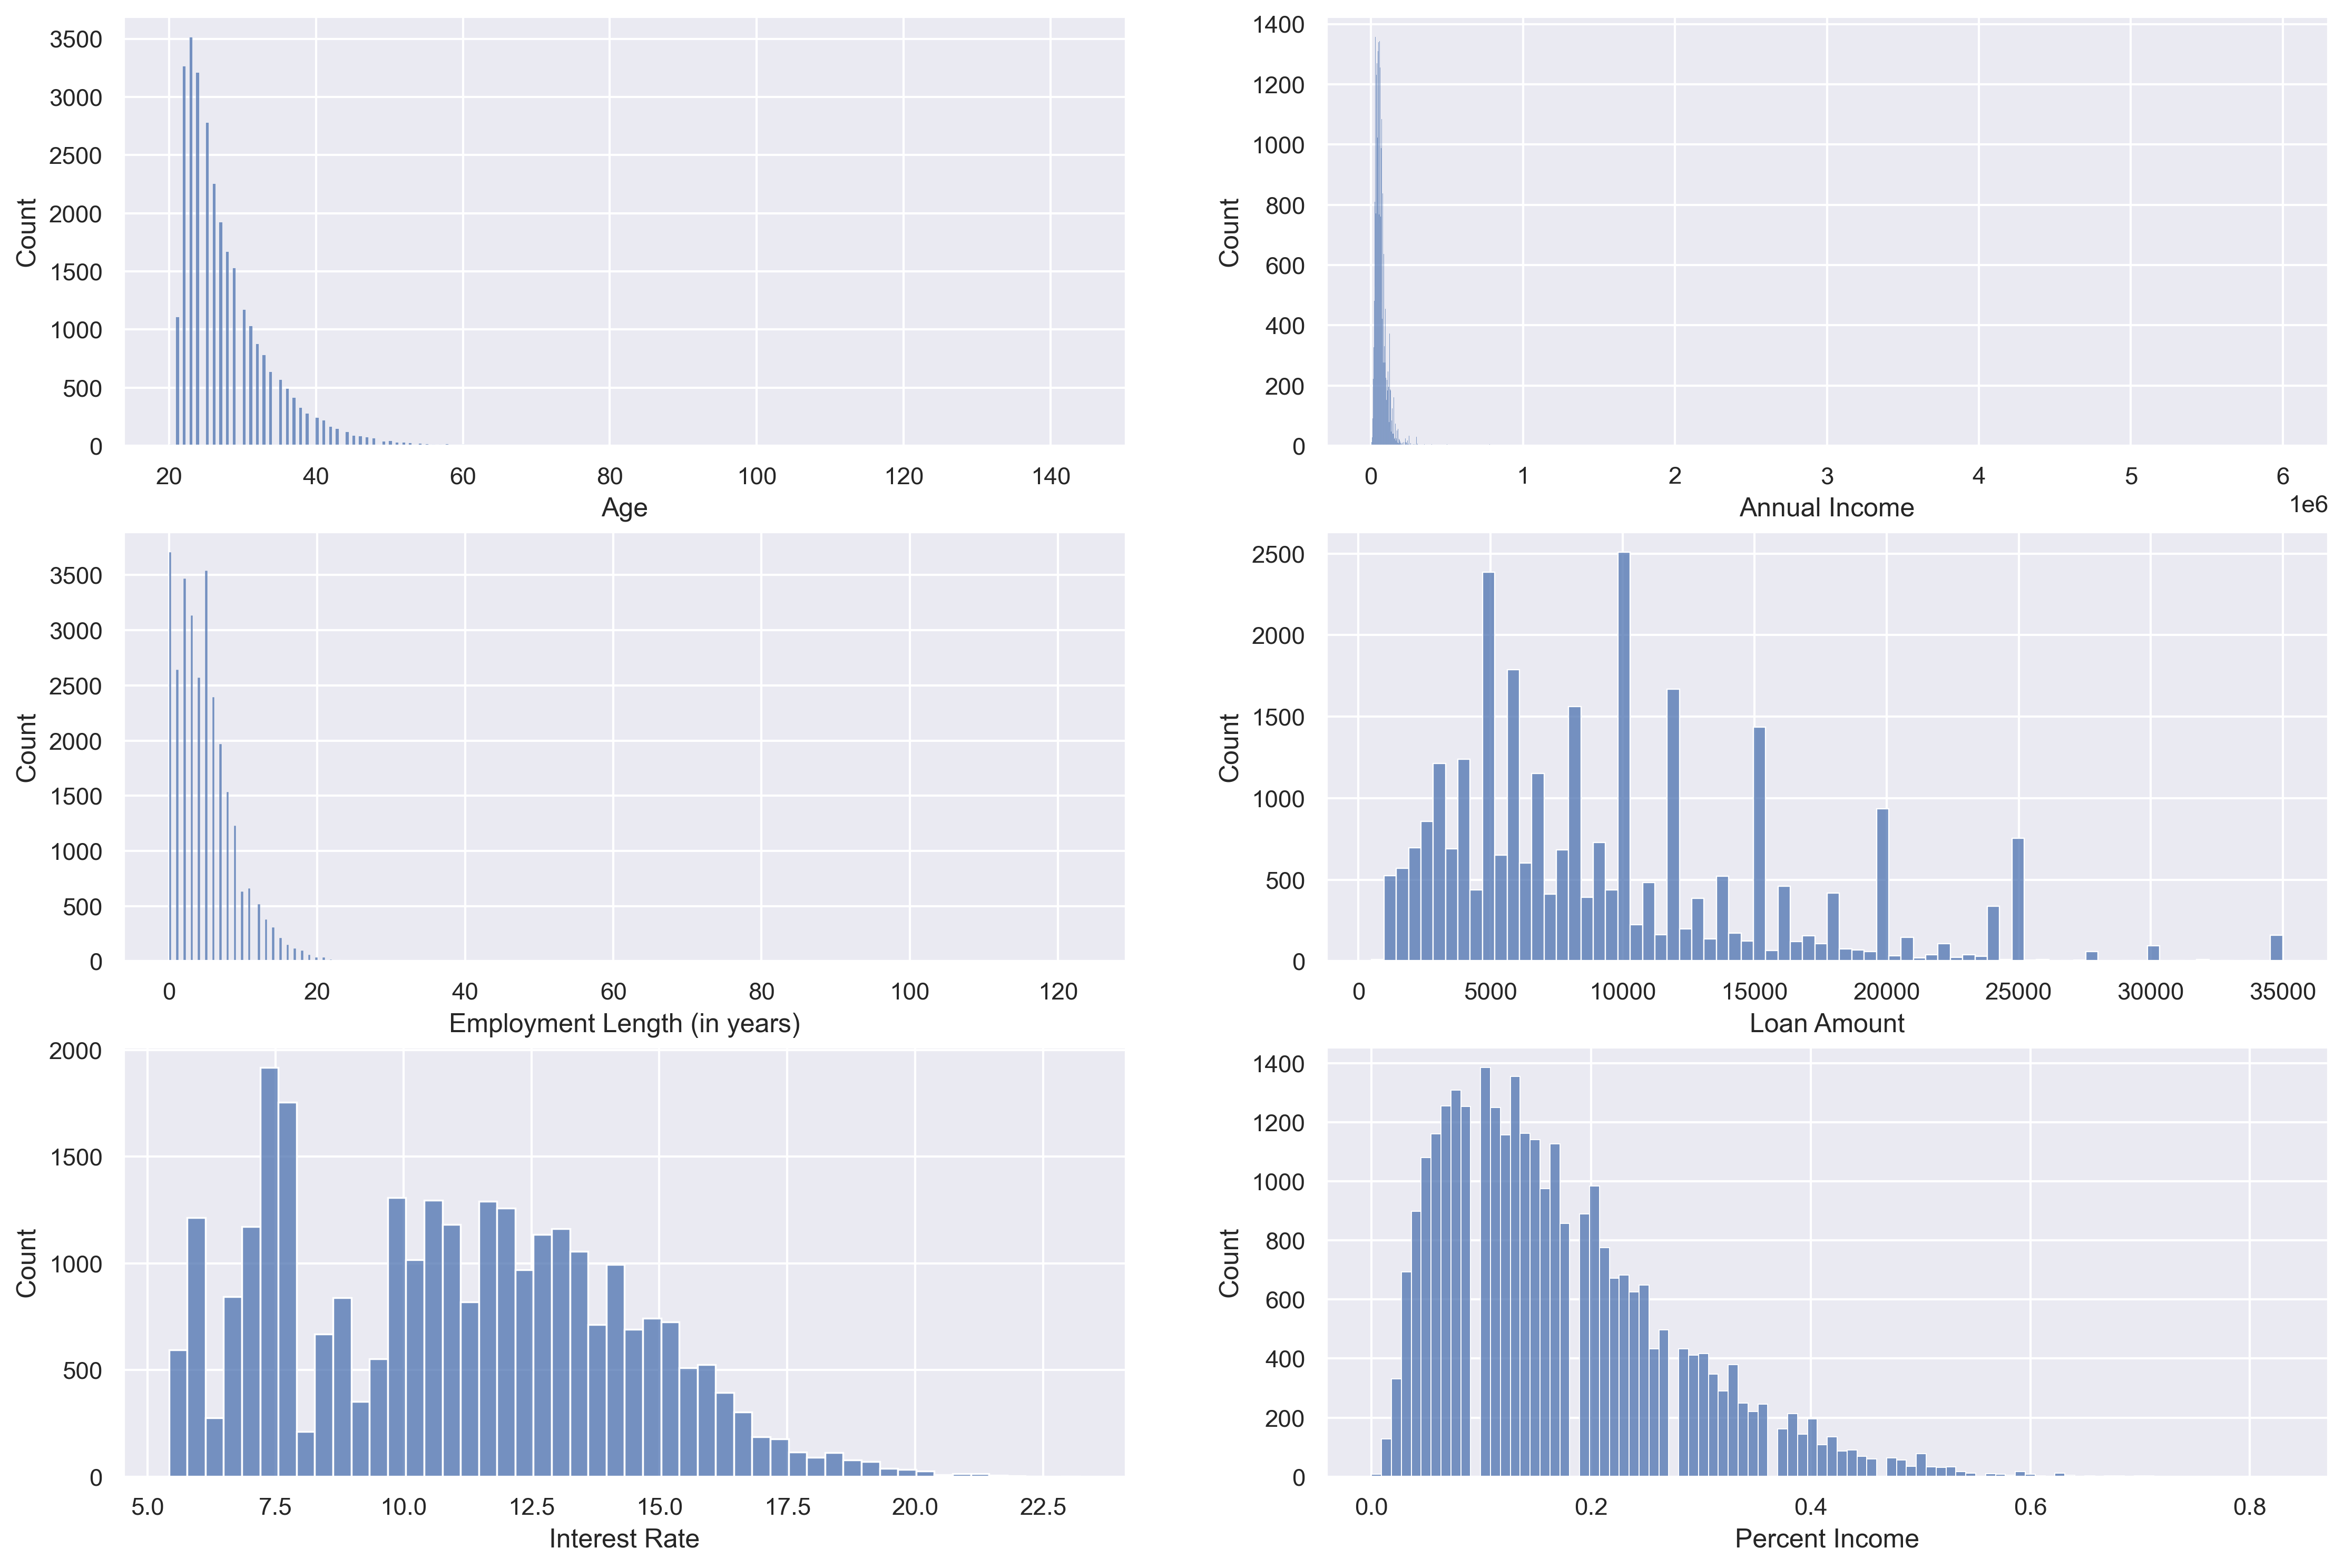

In [23]:
#All the numerical Data plot 

features = [ 'Age', 'Annual Income', 'Employment Length (in years)', 'Loan Amount', 'Interest Rate', 'Percent Income']

plt.figure(figsize = (18, 12), dpi=300)
for i in enumerate(features):
    plt.subplot(3, 2, i[0]+1)
    sns.histplot(x = i[1], data = file)
plt.show()

# Data Visualization_Numerical (Box Plot)

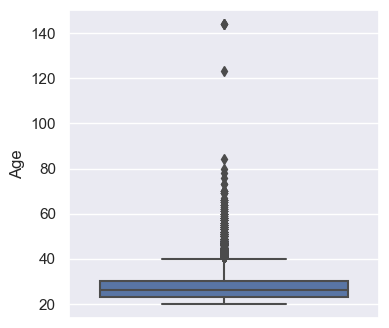

In [24]:
plt.figure(figsize=(4,4))
sns.boxplot( y='Age', data=file, )
plt.show()

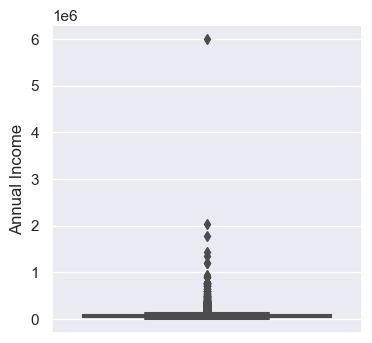

In [25]:
plt.figure(figsize=(4,4))
sns.boxplot(y='Annual Income', data=file, )
plt.show()

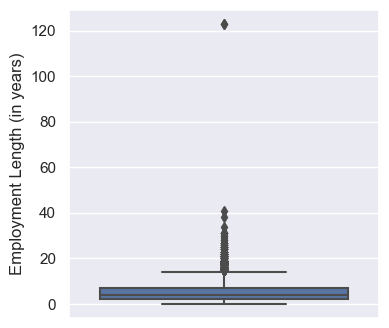

In [26]:
plt.figure(figsize=(4,4))
sns.boxplot(y='Employment Length (in years)', data=file, )
plt.show()

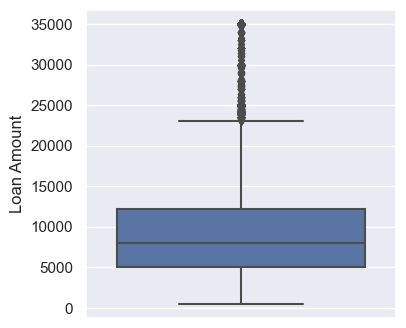

In [27]:
plt.figure(figsize=(4,4))
sns.boxplot(y='Loan Amount', data=file, )
plt.show()

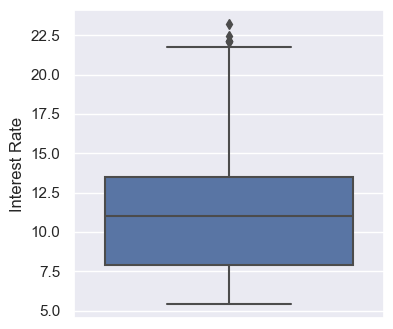

In [28]:
plt.figure(figsize=(4,4))
sns.boxplot(y='Interest Rate', data=file, )
plt.show()

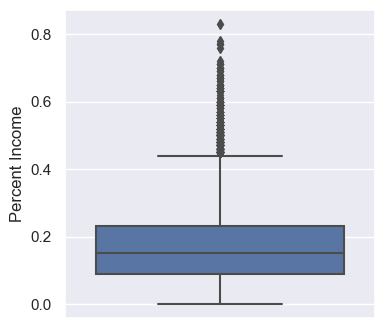

In [29]:
plt.figure(figsize=(4,4))
sns.boxplot(y='Percent Income', data=file, )
plt.show()

In [30]:
#highly correlated to Age -> remove it
#sns.boxplot(y='Credit History Length', data=file, )
#plt.show()

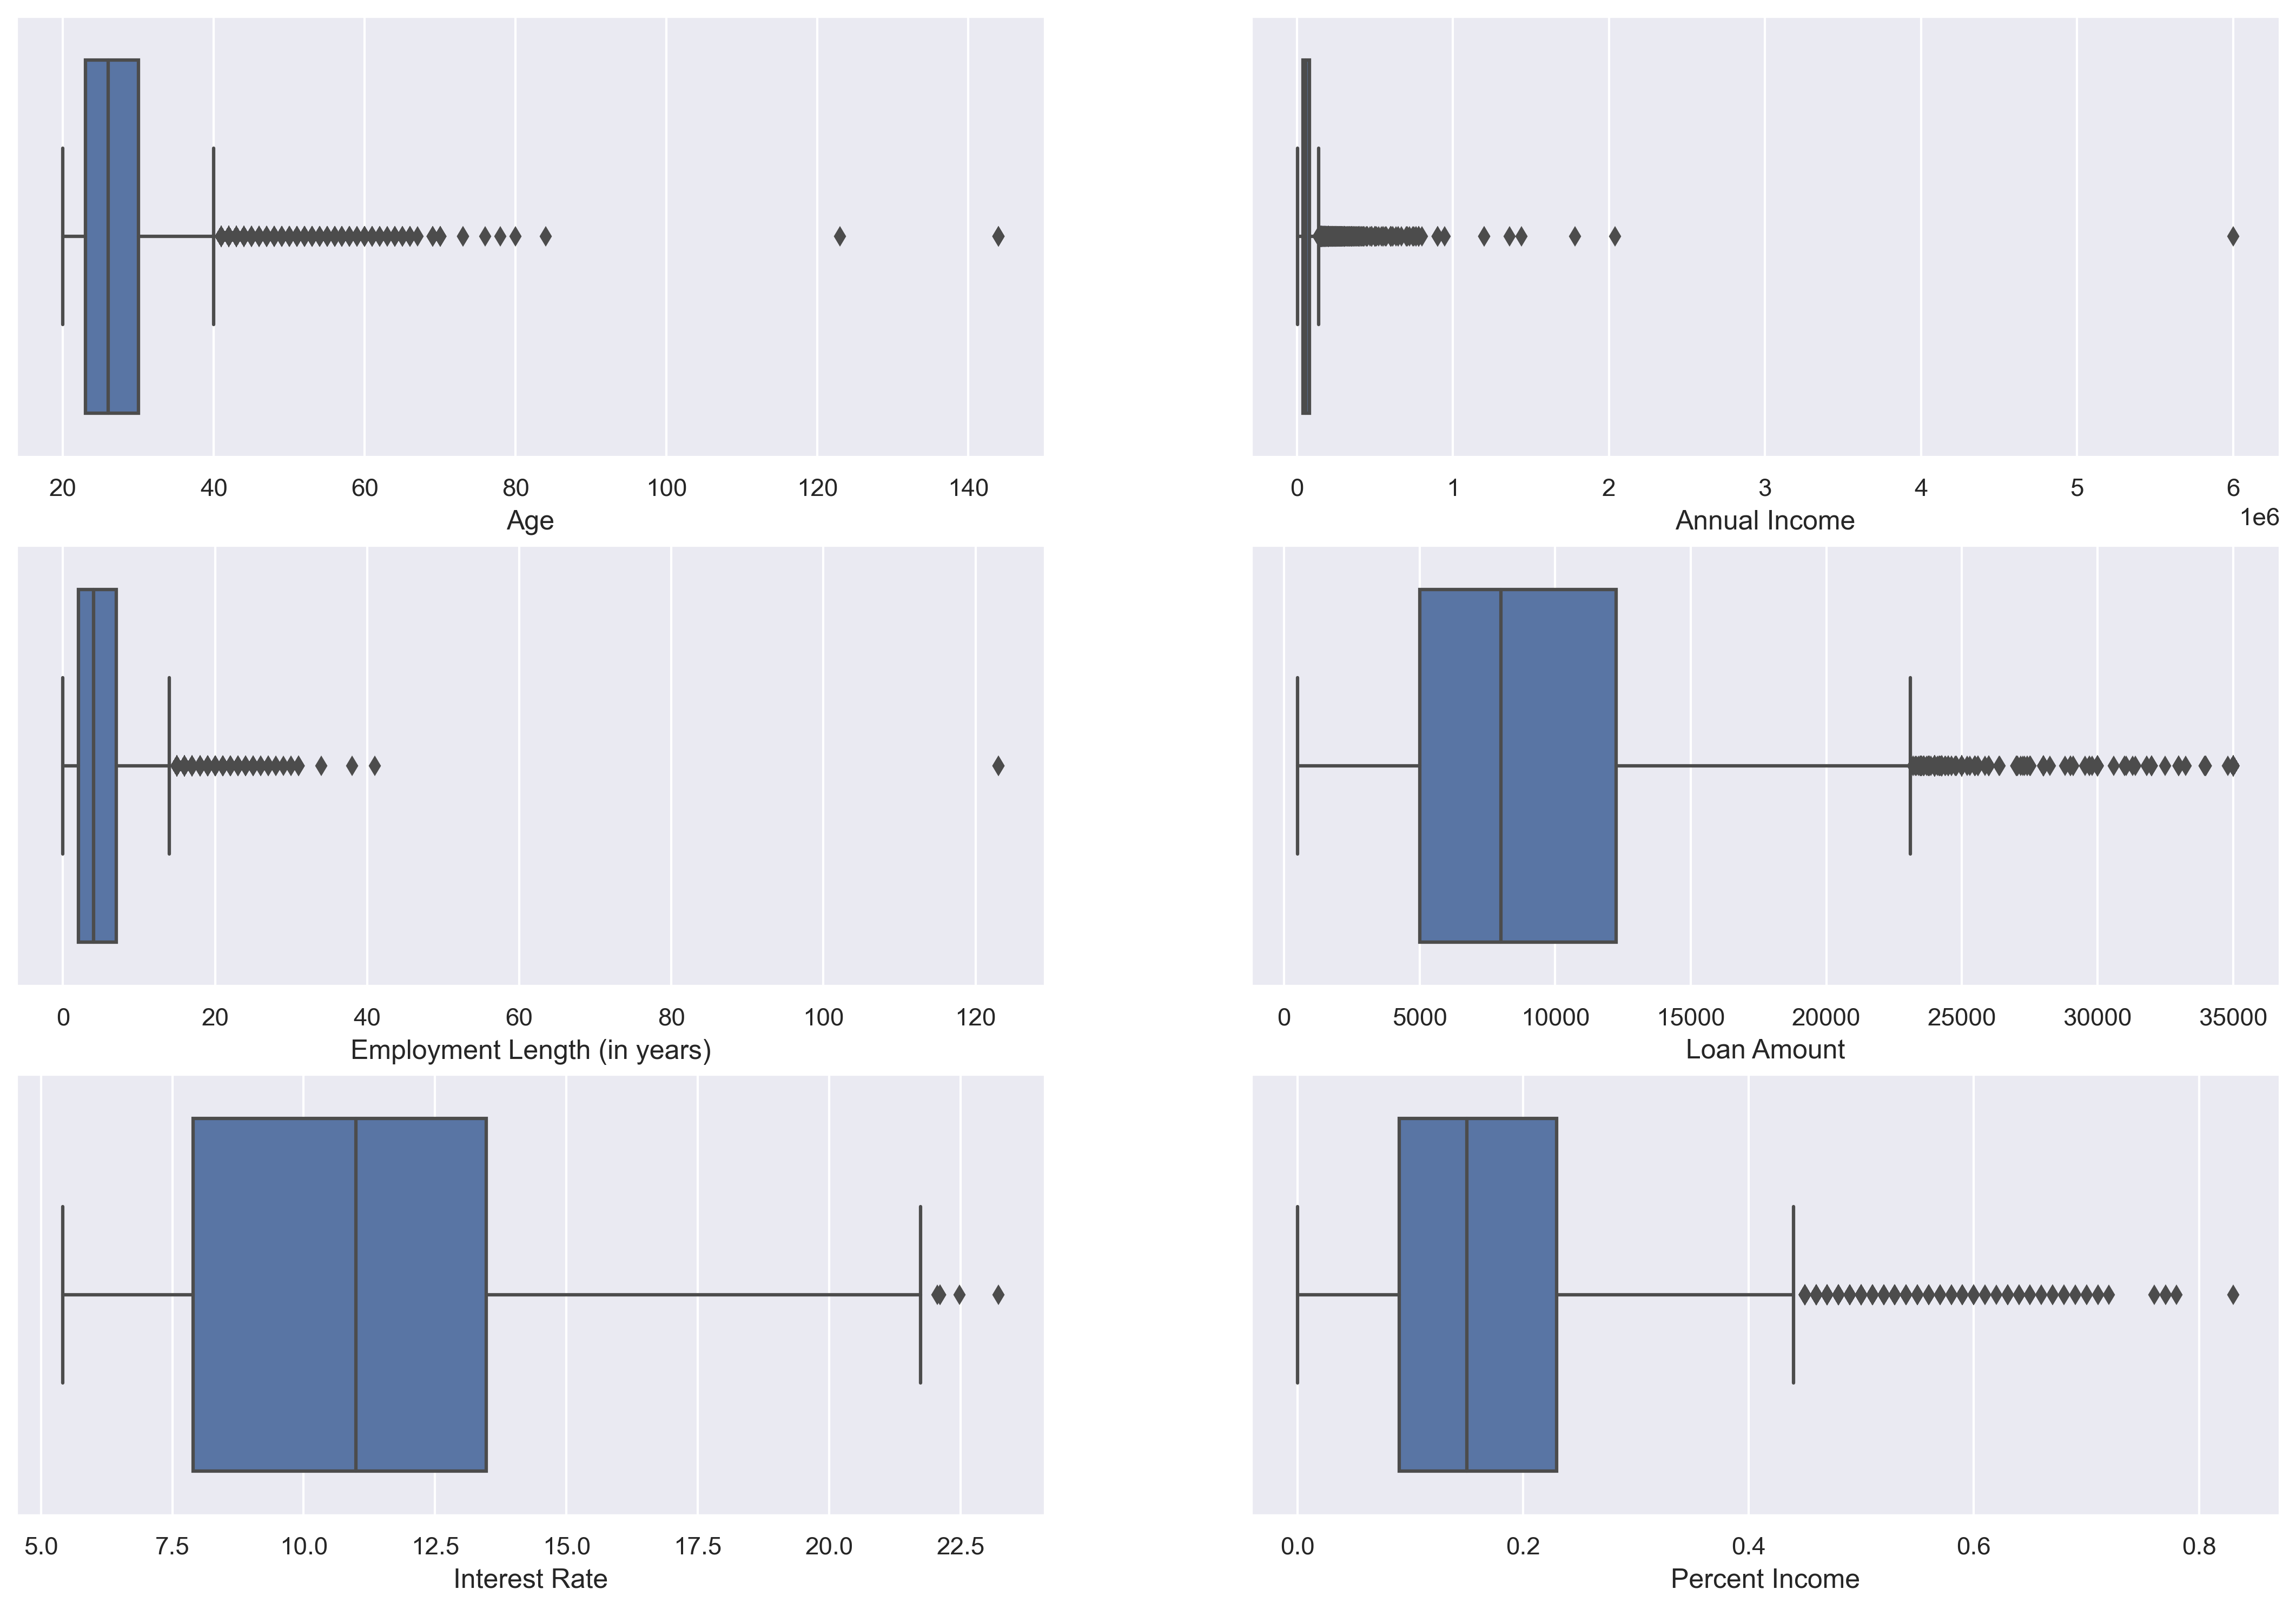

In [31]:
#put all the box plot in one subplot 
features = [ 'Age', 'Annual Income', 'Employment Length (in years)', 'Loan Amount', 'Interest Rate','Percent Income']

plt.figure(figsize = (18, 12), dpi=300)
for i in enumerate(features):
    plt.subplot(3, 2, i[0]+1)
    sns.boxplot(x = i[1], data = file)
plt.show()

# Data Visualization_Categorical (Crosstab & Side-by-Side Bar Chart)

In [32]:
#Home Ownership
crossTabHomeOwnership = pd.crosstab(file['Home Ownership'], file['Loan Status (0 is non default 1 is default)'], margins=True)
crossTabHomeOwnership

Loan Status (0 is non default 1 is default),0,1,All
Home Ownership,,,
MORTGAGE,10583,1539,12122
OTHER,67,27,94
OWN,2187,169,2356
RENT,10164,4729,14893
All,23001,6464,29465


In [33]:
crossTabHomeOwnership['Default Rate'] = ((crossTabHomeOwnership.iloc[:,1]) / (crossTabHomeOwnership.iloc[:,-1])) *100
crossTabHomeOwnership

Loan Status (0 is non default 1 is default),0,1,All,Default Rate
Home Ownership,,,,
MORTGAGE,10583,1539,12122,12.695925
OTHER,67,27,94,28.723404
OWN,2187,169,2356,7.173175
RENT,10164,4729,14893,31.753173
All,23001,6464,29465,21.937892


<AxesSubplot:xlabel='Home Ownership'>

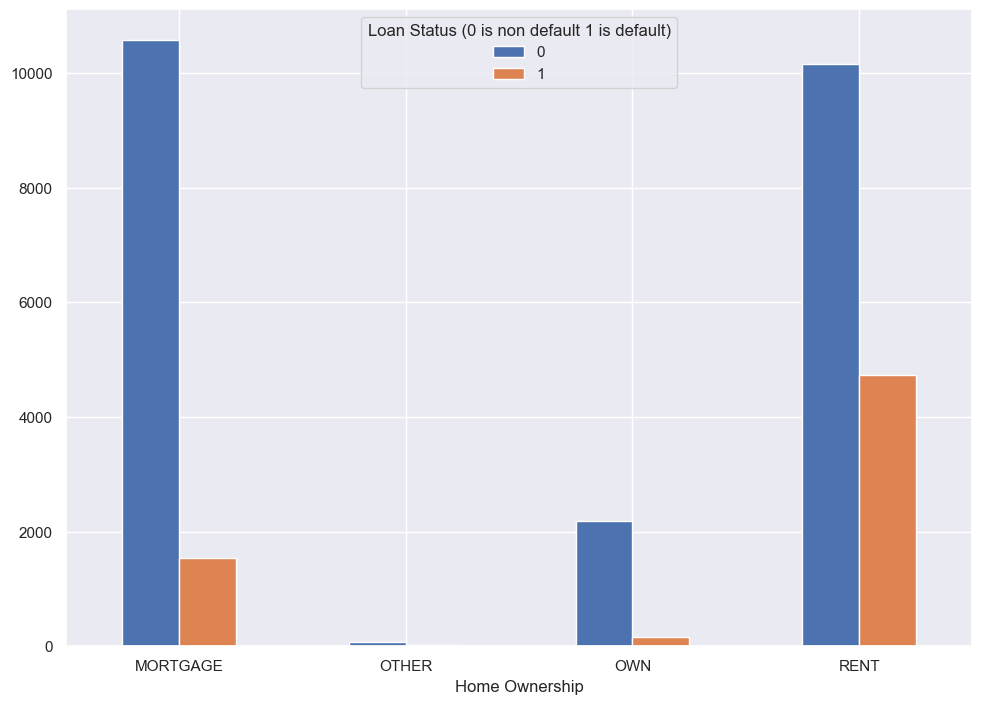

In [34]:
crossTabHomeOwnership = pd.crosstab(file['Home Ownership'], file['Loan Status (0 is non default 1 is default)'])
barHomeOwnership = crossTabHomeOwnership.plot.bar(rot=0)
barHomeOwnership

## -----------------------------------------------------------------------------

In [35]:
#Loan Intent
crossTabLoanIntent = pd.crosstab(file['Loan Intent'], file['Loan Status (0 is non default 1 is default)'], margins=True)
crossTabLoanIntent

Loan Status (0 is non default 1 is default),0,1,All
Loan Intent,,,
DEBTCONSOLIDATION,3357,1346,4703
EDUCATION,4843,1011,5854
HOMEIMPROVEMENT,2427,863,3290
MEDICAL,3980,1471,5451
PERSONAL,4004,1010,5014
VENTURE,4390,763,5153
All,23001,6464,29465


In [36]:
crossTabLoanIntent['Default Rate'] = ((crossTabLoanIntent.iloc[:,1]) / (crossTabLoanIntent.iloc[:,-1])) *100
crossTabLoanIntent

Loan Status (0 is non default 1 is default),0,1,All,Default Rate
Loan Intent,,,,
DEBTCONSOLIDATION,3357,1346,4703,28.620030
EDUCATION,4843,1011,5854,17.270243
HOMEIMPROVEMENT,2427,863,3290,26.231003
MEDICAL,3980,1471,5451,26.985874
PERSONAL,4004,1010,5014,20.143598
VENTURE,4390,763,5153,14.806909
All,23001,6464,29465,21.937892


<AxesSubplot:xlabel='Loan Intent'>

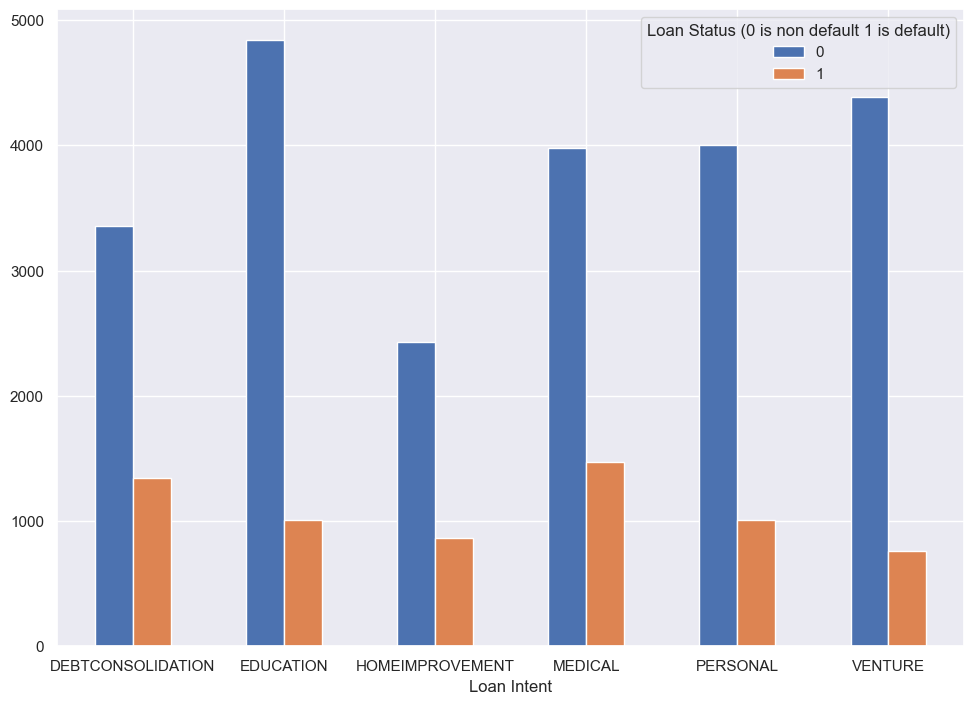

In [37]:
crossTabLoanIntent = pd.crosstab(file['Loan Intent'], file['Loan Status (0 is non default 1 is default)'])
barLoanIntent = crossTabLoanIntent.plot.bar(rot=0)
barLoanIntent

## -----------------------------------------------------------------------------

In [38]:
#Loan Grade
crossTabLoanGrade = pd.crosstab(file['Loan Grade'], file['Loan Status (0 is non default 1 is default)'], margins=True)
crossTabLoanGrade

Loan Status (0 is non default 1 is default),0,1,All
Loan Grade,,,
A,8797,977,9774
B,7867,1528,9395
C,4619,1209,5828
D,1343,1971,3314
E,310,571,881
F,64,150,214
G,1,58,59
All,23001,6464,29465


In [39]:
crossTabLoanGrade['Default Rate'] = ((crossTabLoanGrade.iloc[:,1]) / (crossTabLoanGrade.iloc[:,-1])) *100
crossTabLoanGrade

Loan Status (0 is non default 1 is default),0,1,All,Default Rate
Loan Grade,,,,
A,8797,977,9774,9.995908
B,7867,1528,9395,16.263970
C,4619,1209,5828,20.744681
D,1343,1971,3314,59.474955
E,310,571,881,64.812713
F,64,150,214,70.093458
G,1,58,59,98.305085
All,23001,6464,29465,21.937892


<AxesSubplot:xlabel='Loan Grade'>

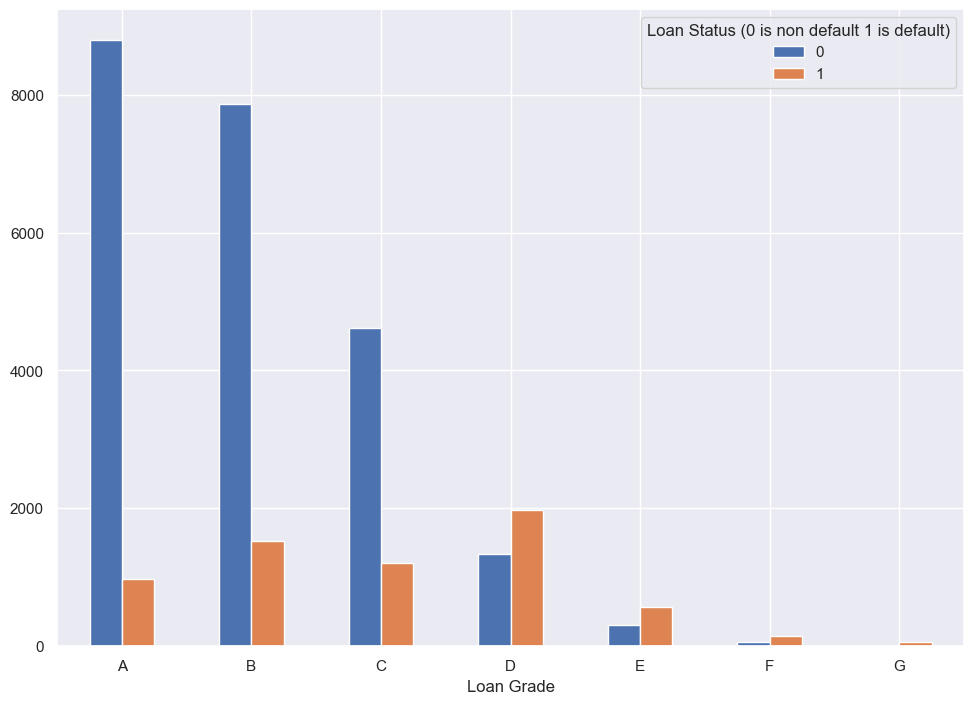

In [40]:
crossTabLoanGrade = pd.crosstab(file['Loan Grade'], file['Loan Status (0 is non default 1 is default)'])
barLoanGrade = crossTabLoanGrade.plot.bar(rot=0)
barLoanGrade

## -----------------------------------------------------------------------------

In [41]:
#Historical default
crossTabHistoricalDefault = pd.crosstab(file['Historical Default'], file['Loan Status (0 is non default 1 is default)'], margins=True)
crossTabHistoricalDefault

Loan Status (0 is non default 1 is default),0,1,All
Historical Default,,,
N,19770,4482,24252
Y,3231,1982,5213
All,23001,6464,29465


In [42]:
crossTabHistoricalDefault['Default Rate'] = ((crossTabHistoricalDefault.iloc[:,1]) / (crossTabHistoricalDefault.iloc[:,-1])) *100
crossTabHistoricalDefault

Loan Status (0 is non default 1 is default),0,1,All,Default Rate
Historical Default,,,,
N,19770,4482,24252,18.480950
Y,3231,1982,5213,38.020334
All,23001,6464,29465,21.937892


<AxesSubplot:xlabel='Historical Default'>

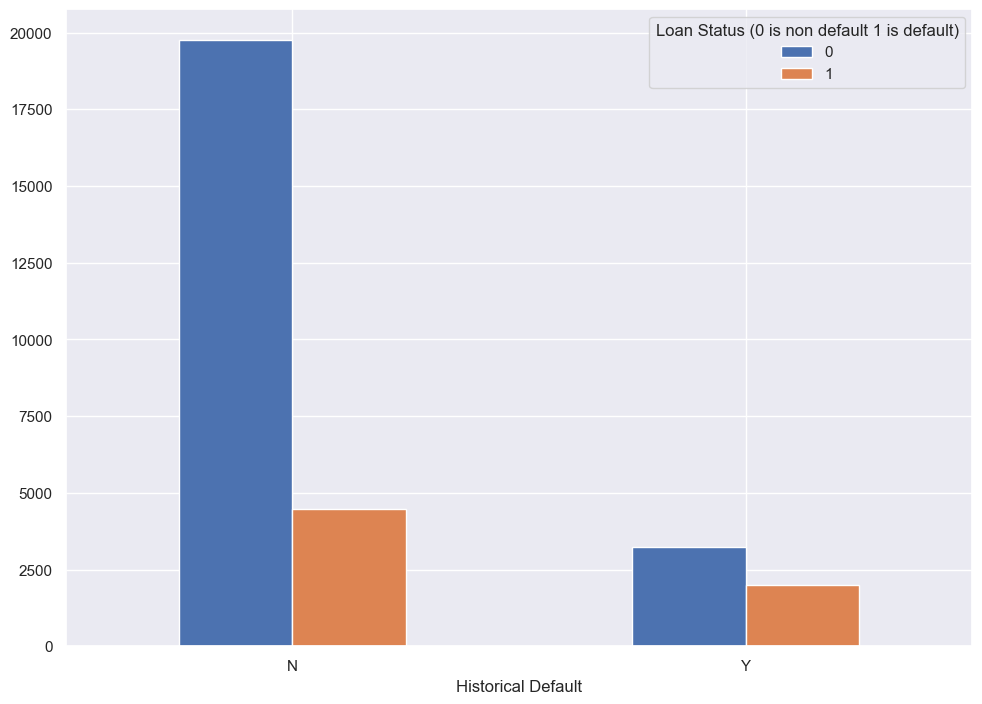

In [43]:
crossTabHistoricalDefault = pd.crosstab(file['Historical Default'], file['Loan Status (0 is non default 1 is default)'])
barHistoricalDefault = crossTabHistoricalDefault.plot.bar(rot=0)
barHistoricalDefault

## -----------------------------------------------------------------------------

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
pd.crosstab(file['Historical Default'], file['Loan Status (0 is non default 1 is default)'])
plt.subplot(2,2,2)
pd.crosstab(file['Historical Default'], file['Loan Status (0 is non default 1 is default)']).plot.bar(rot=0)



- put all the hist plot in one subplot 
features = [ 'Home ownership', 'Loan intent', 'Loan grade', 'Historical default']

plt.figure(figsize = (18, 12), dpi=300)
for i in enumerate(features):
    crossTabHistoricalDefault = pd.crosstab(x = i[1], file['Loan status (0 is non default 1 is default)'], data = file)
    plt.subplot(2, 2, i[0]+1)
    crossTabHistoricalDefault.plot.bar(rot=0)
plt.show()

# Finding and Handling Outlier (with IQR)

In [44]:
#create a function to find outliers using IQR
def find_outliers_IQR(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    lower_limit = q1-1.5*IQR 
    upper_limit = q3+1.5*IQR 
    print('q1: ' + str(q1))
    print('q3: ' + str(q3))
    print('lower limit: ' + str(lower_limit))
    print('upper limit: ' + str(upper_limit) + '\n')
    outliers = data[((data<(lower_limit)) | (data>(upper_limit)))]
    return outliers

In [45]:
#create a function to drop outlier
def drop_outliers_IQR(data):
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    IQR=q3-q1
    lower_limit = q1-1.5*IQR
    upper_limit = q3+1.5*IQR
    not_outliers = file[~((data<(lower_limit)) | (data>(upper_limit)))]
    return not_outliers

## -----------------------------------------------------------------------------

In [46]:
#Age
#follow IQR
AgeOutlier = find_outliers_IQR(file['Age'])
print("number of outliers: "+ str(len(AgeOutlier)))
print("max outlier value: "+ str(AgeOutlier.max()))
print("min outlier value: "+ str(AgeOutlier.min()))
AgeOutlier

q1: 23.0
q3: 30.0
lower limit: 12.5
upper limit: 40.5

number of outliers: 1331
max outlier value: 144
min outlier value: 41


81       144
183      144
575      123
29121     50
29131     43
        ... 
32576     57
32577     54
32578     65
32579     56
32580     66
Name: Age, Length: 1331, dtype: int64

In [47]:
#file_RemoveAge = drop_outliers_IQR(file['Age'])
#file_RemoveAge

In [48]:
#follow guideness
#remove those outlier
lower_limit = 21
upper_limit = 60
AgeOutlier = file[(file['Age']<(lower_limit)) | (file['Age']>(upper_limit))]
print("number of outliers: "+ str(len(AgeOutlier)))
not_outliers = file[~((file['Age']<(lower_limit)) | (file['Age']>(upper_limit)))]
file_RemoveAge = not_outliers
file_RemoveAge

number of outliers: 73


,Id,Age,Annual Income,Home Ownership,Employment Length (in years),Loan Intent,Loan Grade,Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income,Historical Default
0,1,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y
1,2,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N
2,3,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N
3,4,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N
4,5,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
32574,32575,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y
32575,32576,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N
32576,32577,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N
32577,32578,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N


D:\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.w

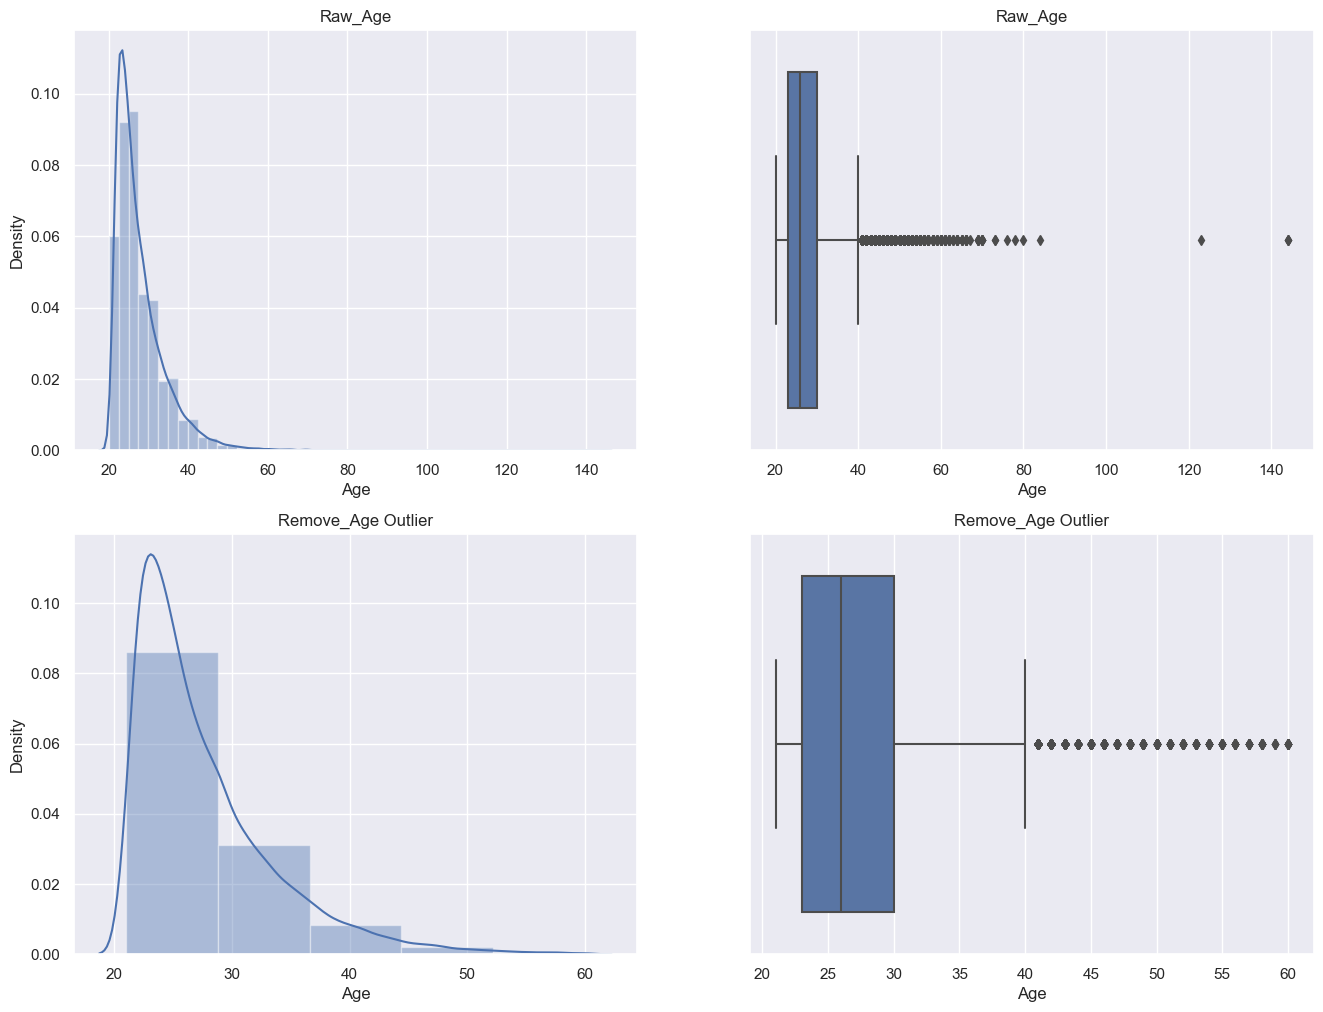

In [49]:
plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
sns.distplot(file['Age']).set_title('Raw_Age')
plt.subplot(2,2,2)
sns.boxplot(file['Age']).set_title('Raw_Age')

plt.subplot(2,2,3)
sns.distplot(file_RemoveAge['Age'], bins=5).set_title('Remove_Age Outlier')
plt.subplot(2,2,4)
sns.boxplot(file_RemoveAge['Age']).set_title('Remove_Age Outlier')
plt.show()

In [50]:
Age_Before_After = pd.DataFrame([['Age_Before', file.shape]],
                   columns = ['Column', 'Shape'])

Age_Remove = pd.DataFrame([['Age_Remove', file_RemoveAge.shape]],
                   columns = ['Column', 'Shape'])

Age_Before_After = Age_Before_After.append(Age_Remove, ignore_index = True)
Age_Before_After


C:\Users\hojk8\AppData\Local\Temp\ipykernel_25216\868356533.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Age_Before_After = Age_Before_After.append(Age_Remove, ignore_index = True)


,Column,Shape
0,Age_Before,"(29465, 12)"
1,Age_Remove,"(29392, 12)"


In [51]:
#Check all the value 
file_RemoveAge.to_excel("D:/Pilot/data/Loan_Default_Dataset/IQR/After/RemoveAge.xlsx", index=False)  

## -----------------------------------------------------------------------------

In [52]:
file_RemoveAge_to_AnnualIncome = file_RemoveAge.copy()
file_RemoveAge_to_AnnualIncome

,Id,Age,Annual Income,Home Ownership,Employment Length (in years),Loan Intent,Loan Grade,Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income,Historical Default
0,1,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y
1,2,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N
2,3,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N
3,4,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N
4,5,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
32574,32575,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y
32575,32576,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N
32576,32577,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N
32577,32578,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N


In [53]:
#Annual Income
AnnualIncomeOutlier = find_outliers_IQR(file_RemoveAge_to_AnnualIncome['Annual Income'])
print("number of outliers: "+ str(len(AnnualIncomeOutlier)))
print("max outlier value: "+ str(AnnualIncomeOutlier.max()))
print("min outlier value: "+ str(AnnualIncomeOutlier.min()))
AnnualIncomeOutlier

q1: 38500.0
q3: 79000.0
lower limit: -22250.0
upper limit: 139750.0

number of outliers: 1447
max outlier value: 2039784
min outlier value: 139913


15       500000
20       162500
33       306000
34       300000
42       300000
          ...  
32541    163000
32543    720000
32544    780000
32551    780000
32579    150000
Name: Annual Income, Length: 1447, dtype: int64

## remove Annual Income outlier ---------------------------------

In [54]:
file_RemoveAge_to_RemoveAnnulIncome = file_RemoveAge.copy()
file_RemoveAge_to_RemoveAnnulIncome

,Id,Age,Annual Income,Home Ownership,Employment Length (in years),Loan Intent,Loan Grade,Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income,Historical Default
0,1,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y
1,2,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N
2,3,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N
3,4,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N
4,5,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
32574,32575,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y
32575,32576,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N
32576,32577,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N
32577,32578,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N


In [55]:
file_RemoveAnnualIncome = file_RemoveAge_to_RemoveAnnulIncome[~((file_RemoveAge_to_RemoveAnnulIncome['Annual Income']<(-22250.0)) | (file_RemoveAge_to_RemoveAnnulIncome['Annual Income']>(139750.0)))]
file_RemoveAnnualIncome

,Id,Age,Annual Income,Home Ownership,Employment Length (in years),Loan Intent,Loan Grade,Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income,Historical Default
0,1,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y
1,2,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N
2,3,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N
3,4,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N
4,5,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
32573,32574,56,90000,MORTGAGE,0.0,PERSONAL,A,7200,6.17,0,0.08,N
32574,32575,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y
32575,32576,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N
32576,32577,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N


In [56]:
file_RemoveAnnualIncome.describe()

,Id,Age,Annual Income,Employment Length (in years),Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income
count,27945.000000,27945.000000,27945.000000,27945.000000,27945.000000,27945.000000,27945.000000,27945.000000
mean,15999.691430,27.498193,58336.046162,4.705922,9261.549472,10.997406,0.225872,0.174519
std,9324.366735,5.877240,27040.609019,3.948455,6018.134696,3.236240,0.418163,0.107199
min,1.000000,21.000000,4000.000000,0.000000,500.000000,5.420000,0.000000,0.010000
25%,7887.000000,23.000000,37900.000000,2.000000,5000.000000,7.900000,0.000000,0.090000
50%,15921.000000,26.000000,54000.000000,4.000000,8000.000000,10.990000,0.000000,0.150000
75%,24007.000000,30.000000,75000.000000,7.000000,12000.000000,13.470000,0.000000,0.230000
max,32578.000000,60.000000,139380.000000,123.000000,35000.000000,23.220000,1.000000,0.830000


## replace Annual Income Outlier --------------------------------

In [57]:
file_RemoveAge_ReplaceAnnualIncome = file_RemoveAge.copy()
file_RemoveAge_ReplaceAnnualIncome

,Id,Age,Annual Income,Home Ownership,Employment Length (in years),Loan Intent,Loan Grade,Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income,Historical Default
0,1,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y
1,2,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N
2,3,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N
3,4,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N
4,5,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
32574,32575,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y
32575,32576,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N
32576,32577,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N
32577,32578,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N


In [58]:
mean = round(file_RemoveAge_ReplaceAnnualIncome['Annual Income'].mean())
mean

65728

In [59]:
percentile5 = round(np.percentile(file_RemoveAge_ReplaceAnnualIncome['Annual Income'], 5))
print('percentile_0.05 = ', percentile5)
percentile95 = round(np.percentile(file_RemoveAge_ReplaceAnnualIncome['Annual Income'], 95))
print('percentile_0.95 = ' , percentile95)

percentile_0.05 =  23000
percentile_0.95 =  138000


In [60]:
#replace outlier with 5th and 95th percentile 
file_RemoveAge_ReplaceAnnualIncome['Annual Income'] = np.where(file_RemoveAge_ReplaceAnnualIncome['Annual Income'] < -22250.0, percentile5, file_RemoveAge_ReplaceAnnualIncome['Annual Income'])
file_RemoveAge_ReplaceAnnualIncome['Annual Income'] = np.where(file_RemoveAge_ReplaceAnnualIncome['Annual Income'] > 139750.0, percentile95, file_RemoveAge_ReplaceAnnualIncome['Annual Income'])
file_ReplaceAnnualIncome = file_RemoveAge_ReplaceAnnualIncome
file_ReplaceAnnualIncome

,Id,Age,Annual Income,Home Ownership,Employment Length (in years),Loan Intent,Loan Grade,Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income,Historical Default
0,1,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y
1,2,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N
2,3,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N
3,4,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N
4,5,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
32574,32575,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y
32575,32576,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N
32576,32577,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N
32577,32578,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N


## compare outlier in visualization -------------------------------

In [61]:
file_RemoveAge = file_RemoveAge.copy()
file_RemoveAge

,Id,Age,Annual Income,Home Ownership,Employment Length (in years),Loan Intent,Loan Grade,Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income,Historical Default
0,1,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y
1,2,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N
2,3,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N
3,4,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N
4,5,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
32574,32575,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y
32575,32576,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N
32576,32577,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N
32577,32578,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N


D:\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.w

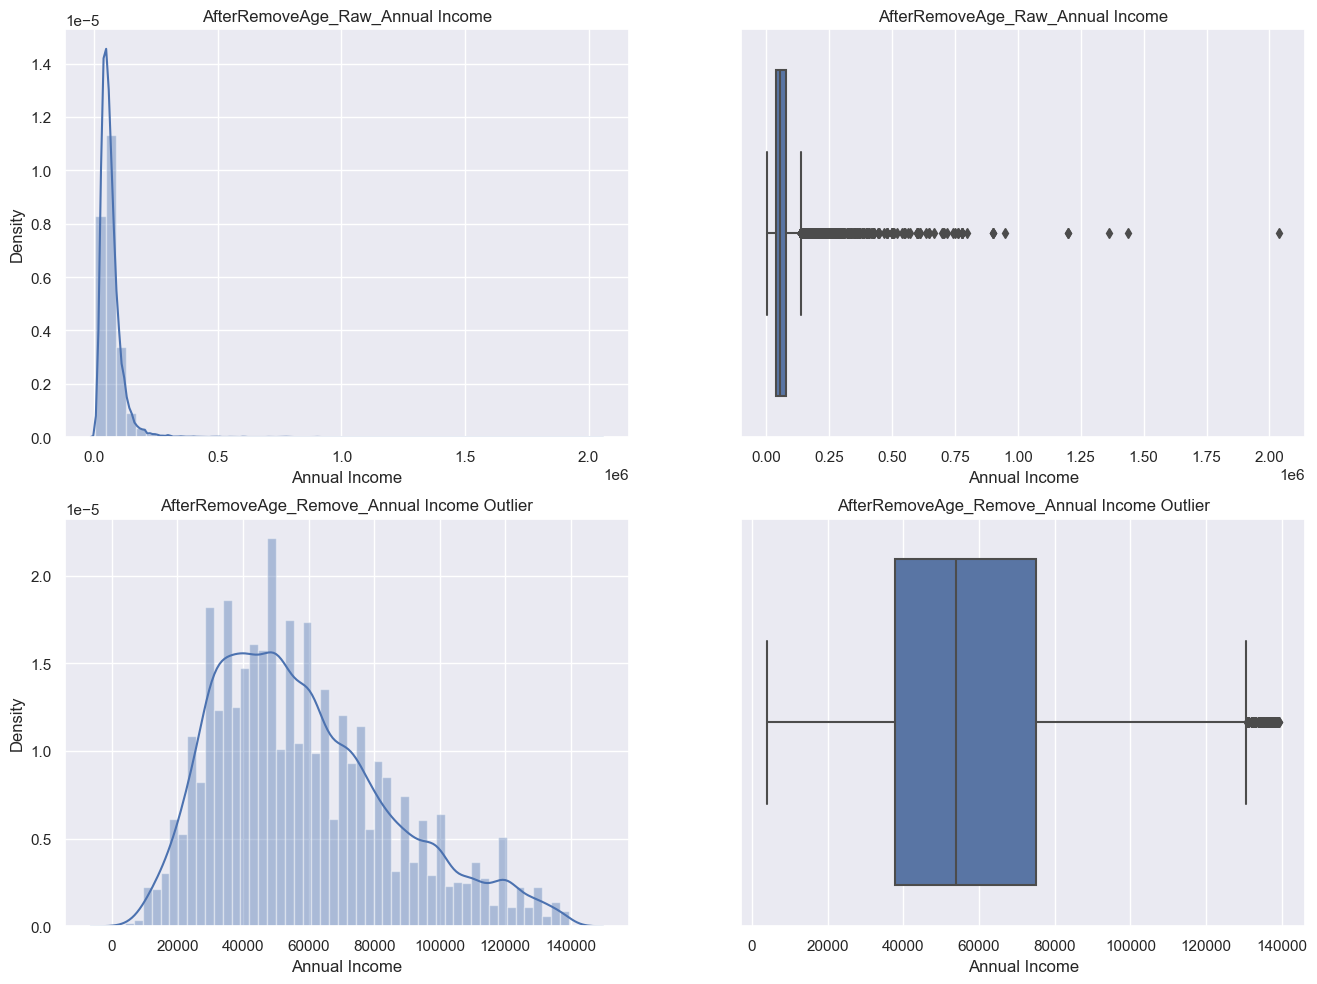

D:\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


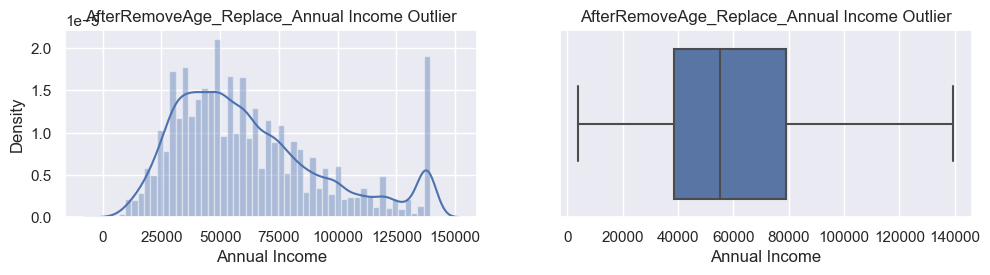

In [62]:
plt.figure(figsize=(16,18))
plt.subplot(3,2,1)
sns.distplot(file_RemoveAge['Annual Income']).set_title('AfterRemoveAge_Raw_Annual Income')
plt.subplot(3,2,2)
sns.boxplot(file_RemoveAge['Annual Income']).set_title('AfterRemoveAge_Raw_Annual Income')

plt.subplot(3,2,3)
sns.distplot(file_RemoveAnnualIncome['Annual Income']).set_title('AfterRemoveAge_Remove_Annual Income Outlier')
plt.subplot(3,2,4)
sns.boxplot(file_RemoveAnnualIncome['Annual Income']).set_title('AfterRemoveAge_Remove_Annual Income Outlier')
plt.show()

plt.subplot(3,2,5)
sns.distplot(file_ReplaceAnnualIncome['Annual Income']).set_title('AfterRemoveAge_Replace_Annual Income Outlier')
plt.subplot(3,2,6)
sns.boxplot(file_ReplaceAnnualIncome['Annual Income']).set_title('AfterRemoveAge_Replace_Annual Income Outlier')
plt.show()

- There is no outlier in the file_RemoveAge. 

Outlier means those extract data, and we didnt detect it here because it was big.



- since we can see before replace those outlier with percentile of the Annual Income, the result is better and the outlier looks make sense.

Annual Income can be more than 14k it was natural outlier. Can someone earn more and someone earn less. 

Hence, we keep the natural outlier and doesnt have to replace all the outlier. 

## check the shape of the file --------------------------------------
- to make sure we replace and remove work well

In [63]:
AnnualIncome_Before_After = pd.DataFrame([['AnnualIncome_Before', file_RemoveAge.shape]],
                   columns = ['Column', 'Shape'])

AnnualIncome_Remove = pd.DataFrame([['AnnualIncome_Remove', file_RemoveAnnualIncome.shape]],
                   columns = ['Column', 'Shape'])

AnnualIncome_Before_After = AnnualIncome_Before_After.append(AnnualIncome_Remove, ignore_index = True)

AnnualIncome_Replace = pd.DataFrame([['AnnualIncome_Replace', file_ReplaceAnnualIncome.shape]],
                   columns = ['Column', 'Shape'])

AnnualIncome_Before_After = AnnualIncome_Before_After.append(AnnualIncome_Replace, ignore_index = True)
AnnualIncome_Before_After


C:\Users\hojk8\AppData\Local\Temp\ipykernel_25216\4095684418.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AnnualIncome_Before_After = AnnualIncome_Before_After.append(AnnualIncome_Remove, ignore_index = True)
C:\Users\hojk8\AppData\Local\Temp\ipykernel_25216\4095684418.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  AnnualIncome_Before_After = AnnualIncome_Before_After.append(AnnualIncome_Replace, ignore_index = True)


,Column,Shape
0,AnnualIncome_Before,"(29392, 12)"
1,AnnualIncome_Remove,"(27945, 12)"
2,AnnualIncome_Replace,"(29392, 12)"


In [64]:
#Check all the value 
file_RemoveAnnualIncome.to_excel("D:/Pilot/data/Loan_Default_Dataset/IQR/After/RemoveAnnualIncome.xlsx", index=False)  

## -----------------------------------------------------------------------------

In [65]:
file_RemoveAnnualIncome_to_EmploymentLength = file_RemoveAnnualIncome.copy()
file_RemoveAnnualIncome_to_EmploymentLength

,Id,Age,Annual Income,Home Ownership,Employment Length (in years),Loan Intent,Loan Grade,Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income,Historical Default
0,1,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y
1,2,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N
2,3,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N
3,4,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N
4,5,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
32573,32574,56,90000,MORTGAGE,0.0,PERSONAL,A,7200,6.17,0,0.08,N
32574,32575,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y
32575,32576,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N
32576,32577,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N


In [66]:
#Employment length (in years)
EmploymentLengthOutlier = find_outliers_IQR(file_RemoveAnnualIncome_to_EmploymentLength['Employment Length (in years)'])
print("number of outliers: "+ str(len(EmploymentLengthOutlier)))
print("max outlier value: "+ str(EmploymentLengthOutlier.max()))
print("min outlier value: "+ str(EmploymentLengthOutlier.min()))
EmploymentLengthOutlier

q1: 2.0
q3: 7.0
lower limit: -5.5
upper limit: 14.5

number of outliers: 678
max outlier value: 123.0
min outlier value: 15.0


0        123.0
17850     17.0
17888     18.0
17916     15.0
18014     15.0
         ...  
32500     15.0
32508     24.0
32515     38.0
32516     23.0
32519     16.0
Name: Employment Length (in years), Length: 678, dtype: float64

In [67]:
#Employment length (in years)
#find those not logically employment length 
term_condition = file_RemoveAnnualIncome_to_EmploymentLength['Age'] - file_RemoveAnnualIncome_to_EmploymentLength['Employment Length (in years)'] 
term_condition

0       -101.0
1         16.0
2         24.0
3         19.0
4         16.0
         ...  
32573     56.0
32574     48.0
32575     52.0
32576     56.0
32577     50.0
Length: 27945, dtype: float64

In [68]:
#remove employment length's term_condition those less than 14
#since FLSA sets 14 years old as the minimum age for employment
outlier = file_RemoveAnnualIncome_to_EmploymentLength[(term_condition<14)]
print('number of outliers: ', str(len(outlier)))
file_RemoveEmploymentLength = file_RemoveAnnualIncome_to_EmploymentLength[~(term_condition<14)]
file_RemoveEmploymentLength

number of outliers:  1


,Id,Age,Annual Income,Home Ownership,Employment Length (in years),Loan Intent,Loan Grade,Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income,Historical Default
1,2,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N
2,3,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N
3,4,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N
4,5,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y
5,6,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N
...,...,...,...,...,...,...,...,...,...,...,...,...
32573,32574,56,90000,MORTGAGE,0.0,PERSONAL,A,7200,6.17,0,0.08,N
32574,32575,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y
32575,32576,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N
32576,32577,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N


In [69]:
file_RemoveAnnualIncome = file_RemoveAnnualIncome.copy()
file_RemoveAnnualIncome

,Id,Age,Annual Income,Home Ownership,Employment Length (in years),Loan Intent,Loan Grade,Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income,Historical Default
0,1,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y
1,2,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N
2,3,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N
3,4,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N
4,5,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
32573,32574,56,90000,MORTGAGE,0.0,PERSONAL,A,7200,6.17,0,0.08,N
32574,32575,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y
32575,32576,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N
32576,32577,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N


D:\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.w

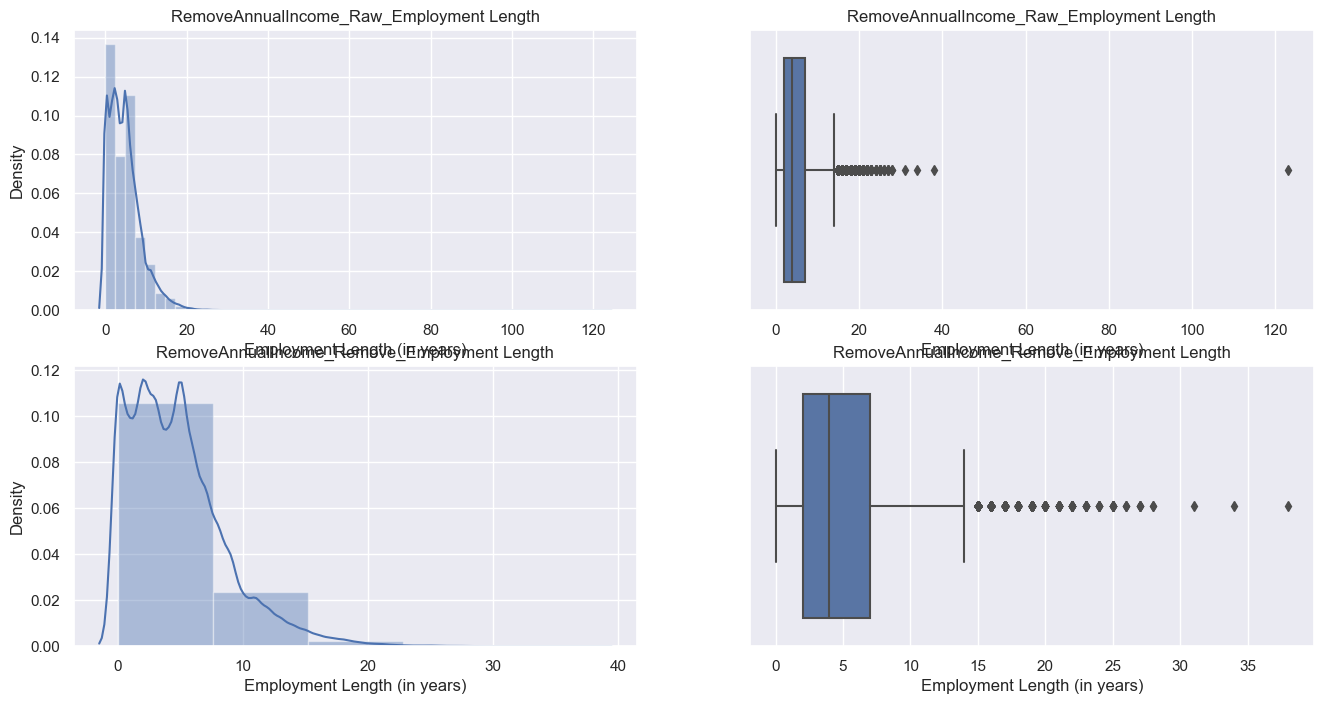

In [70]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(file_RemoveAnnualIncome['Employment Length (in years)']).set_title('RemoveAnnualIncome_Raw_Employment Length')
plt.subplot(2,2,2)
sns.boxplot(file_RemoveAnnualIncome['Employment Length (in years)']).set_title('RemoveAnnualIncome_Raw_Employment Length')

plt.subplot(2,2,3)
sns.distplot(file_RemoveEmploymentLength['Employment Length (in years)'], bins=5).set_title('RemoveAnnualIncome_Remove_Employment Length')
plt.subplot(2,2,4)
sns.boxplot(file_RemoveEmploymentLength['Employment Length (in years)']).set_title('RemoveAnnualIncome_Remove_Employment Length')
plt.show()

In [71]:
EmploymentLength_Before_After = pd.DataFrame([['EmploymentLength_Before', file_RemoveAnnualIncome.shape]],
                                   columns = ['Column', 'Shape'])


EmploymentLength_Remove = pd.DataFrame([['EmploymentLength_Remove', file_RemoveEmploymentLength.shape]],
                                   columns = ['Column', 'Shape'])

EmploymentLength_Before_After = EmploymentLength_Before_After.append(EmploymentLength_Remove, ignore_index = True)
EmploymentLength_Before_After


C:\Users\hojk8\AppData\Local\Temp\ipykernel_25216\472818247.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  EmploymentLength_Before_After = EmploymentLength_Before_After.append(EmploymentLength_Remove, ignore_index = True)


,Column,Shape
0,EmploymentLength_Before,"(27945, 12)"
1,EmploymentLength_Remove,"(27944, 12)"


In [72]:
#Check all the value 
file_RemoveEmploymentLength.to_excel("D:/Pilot/data/Loan_Default_Dataset/IQR/After/RemoveEmplymentLength.xlsx", index=False)

## -----------------------------------------------------------------------------

In [73]:
file_RemoveEmploymentLength_to_LoanAmount = file_RemoveEmploymentLength.copy()
file_RemoveEmploymentLength_to_LoanAmount

,Id,Age,Annual Income,Home Ownership,Employment Length (in years),Loan Intent,Loan Grade,Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income,Historical Default
1,2,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N
2,3,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N
3,4,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N
4,5,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y
5,6,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N
...,...,...,...,...,...,...,...,...,...,...,...,...
32573,32574,56,90000,MORTGAGE,0.0,PERSONAL,A,7200,6.17,0,0.08,N
32574,32575,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y
32575,32576,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N
32576,32577,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N


In [74]:
#Loan amount
LoanAmountOutlier = find_outliers_IQR(file_RemoveEmploymentLength_to_LoanAmount['Loan Amount'])
print("number of outliers: "+ str(len(LoanAmountOutlier)))
print("max outlier value: "+ str(LoanAmountOutlier.max()))
print("min outlier value: "+ str(LoanAmountOutlier.min()))
LoanAmountOutlier

q1: 5000.0
q3: 12000.0
lower limit: -5500.0
upper limit: 22500.0

number of outliers: 1203
max outlier value: 35000
min outlier value: 22550


3        35000
4        35000
6        35000
7        35000
8        35000
         ...  
32301    35000
32302    35000
32315    24000
32316    24000
32524    30000
Name: Loan Amount, Length: 1203, dtype: int64

## remove Loan Amount Outlier ----------------------------------

In [75]:
file_RemoveEmploymentLength_RemoveLoanAmount = file_RemoveEmploymentLength.copy()
file_RemoveEmploymentLength_RemoveLoanAmount

,Id,Age,Annual Income,Home Ownership,Employment Length (in years),Loan Intent,Loan Grade,Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income,Historical Default
1,2,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N
2,3,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N
3,4,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N
4,5,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y
5,6,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N
...,...,...,...,...,...,...,...,...,...,...,...,...
32573,32574,56,90000,MORTGAGE,0.0,PERSONAL,A,7200,6.17,0,0.08,N
32574,32575,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y
32575,32576,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N
32576,32577,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N


In [76]:
file_RemoveLoanAmount = file_RemoveEmploymentLength_RemoveLoanAmount[~((file_RemoveEmploymentLength_RemoveLoanAmount['Loan Amount']<(-5500.0)) | (file_RemoveEmploymentLength_RemoveLoanAmount['Loan Amount']>(22500.0)))]
file_RemoveLoanAmount

,Id,Age,Annual Income,Home Ownership,Employment Length (in years),Loan Intent,Loan Grade,Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income,Historical Default
1,2,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N
2,3,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N
5,6,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N
9,10,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N
11,12,21,10000,OWN,2.0,HOMEIMPROVEMENT,A,4500,8.63,1,0.45,N
...,...,...,...,...,...,...,...,...,...,...,...,...
32573,32574,56,90000,MORTGAGE,0.0,PERSONAL,A,7200,6.17,0,0.08,N
32574,32575,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y
32575,32576,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N
32576,32577,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N


In [77]:
file_RemoveLoanAmount.describe()

,Id,Age,Annual Income,Employment Length (in years),Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income
count,26741.000000,26741.000000,26741.000000,26741.000000,26741.000000,26741.000000,26741.000000,26741.000000
mean,15973.793426,27.477207,57035.130586,4.658315,8503.493699,10.916318,0.216933,0.167905
std,9291.557440,5.882702,26390.987824,3.861210,4903.270923,3.207482,0.412164,0.102683
min,2.000000,21.000000,4000.000000,0.000000,500.000000,5.420000,0.000000,0.010000
25%,7822.000000,23.000000,36996.000000,2.000000,5000.000000,7.880000,0.000000,0.090000
50%,15791.000000,26.000000,52000.000000,4.000000,7500.000000,10.990000,0.000000,0.150000
75%,23911.000000,30.000000,72000.000000,7.000000,12000.000000,13.350000,0.000000,0.220000
max,32578.000000,60.000000,139380.000000,38.000000,22500.000000,23.220000,1.000000,0.830000


## replace Loan Amount outlier -----------------------------------

In [78]:
file_RemoveEmploymentLength_ReplaceLoanAmount = file_RemoveEmploymentLength.copy()
file_RemoveEmploymentLength_ReplaceLoanAmount

,Id,Age,Annual Income,Home Ownership,Employment Length (in years),Loan Intent,Loan Grade,Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income,Historical Default
1,2,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N
2,3,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N
3,4,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N
4,5,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y
5,6,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N
...,...,...,...,...,...,...,...,...,...,...,...,...
32573,32574,56,90000,MORTGAGE,0.0,PERSONAL,A,7200,6.17,0,0.08,N
32574,32575,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y
32575,32576,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N
32576,32577,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N


In [79]:
mean = round(file_RemoveEmploymentLength_ReplaceLoanAmount['Loan Amount'].mean())
mean

9261

In [80]:
percentile5 = round(np.percentile(file_RemoveEmploymentLength_ReplaceLoanAmount['Loan Amount'], 5))
print('percentile_0.05 = ', percentile5)
percentile95 = round(np.percentile(file_RemoveEmploymentLength_ReplaceLoanAmount['Loan Amount'], 95))
print('percentile_0.95 = ' , percentile95)

percentile_0.05 =  2000
percentile_0.95 =  21000


In [81]:
file_RemoveEmploymentLength_ReplaceLoanAmount['Loan Amount'] = np.where(file_RemoveEmploymentLength_ReplaceLoanAmount['Loan Amount'] < -5500.0, percentile5, file_RemoveEmploymentLength_ReplaceLoanAmount['Loan Amount'])
file_RemoveEmploymentLength_ReplaceLoanAmount['Loan Amount'] = np.where(file_RemoveEmploymentLength_ReplaceLoanAmount['Loan Amount'] > 22500.0, percentile95, file_RemoveEmploymentLength_ReplaceLoanAmount['Loan Amount'])
file_ReplaceLoanAmount = file_RemoveEmploymentLength_ReplaceLoanAmount
file_ReplaceLoanAmount

,Id,Age,Annual Income,Home Ownership,Employment Length (in years),Loan Intent,Loan Grade,Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income,Historical Default
1,2,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N
2,3,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N
3,4,23,65500,RENT,4.0,MEDICAL,C,21000,15.23,1,0.53,N
4,5,24,54400,RENT,8.0,MEDICAL,C,21000,14.27,1,0.55,Y
5,6,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N
...,...,...,...,...,...,...,...,...,...,...,...,...
32573,32574,56,90000,MORTGAGE,0.0,PERSONAL,A,7200,6.17,0,0.08,N
32574,32575,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y
32575,32576,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N
32576,32577,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N


In [82]:
file_ReplaceLoanAmount.describe()

,Id,Age,Annual Income,Employment Length (in years),Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income
count,27944.000000,27944.000000,27944.000000,27944.000000,27944.000000,27944.000000,27944.000000,27944.000000
mean,16000.263956,27.498390,58336.022402,4.701689,9041.473125,10.997227,0.225845,0.174504
std,9324.042371,5.877253,27041.092575,3.884591,5425.926662,3.236158,0.418145,0.107172
min,2.000000,21.000000,4000.000000,0.000000,500.000000,5.420000,0.000000,0.010000
25%,7887.750000,23.000000,37894.000000,2.000000,5000.000000,7.900000,0.000000,0.090000
50%,15921.500000,26.000000,54000.000000,4.000000,8000.000000,10.990000,0.000000,0.150000
75%,24007.250000,30.000000,75000.000000,7.000000,12000.000000,13.470000,0.000000,0.230000
max,32578.000000,60.000000,139380.000000,38.000000,22500.000000,23.220000,1.000000,0.830000


## compare in visualization -----------------------------------------

In [83]:
file_RemoveEmploymentLength = file_RemoveEmploymentLength.copy()
file_RemoveEmploymentLength

,Id,Age,Annual Income,Home Ownership,Employment Length (in years),Loan Intent,Loan Grade,Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income,Historical Default
1,2,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N
2,3,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N
3,4,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N
4,5,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y
5,6,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N
...,...,...,...,...,...,...,...,...,...,...,...,...
32573,32574,56,90000,MORTGAGE,0.0,PERSONAL,A,7200,6.17,0,0.08,N
32574,32575,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y
32575,32576,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N
32576,32577,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N


D:\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.w

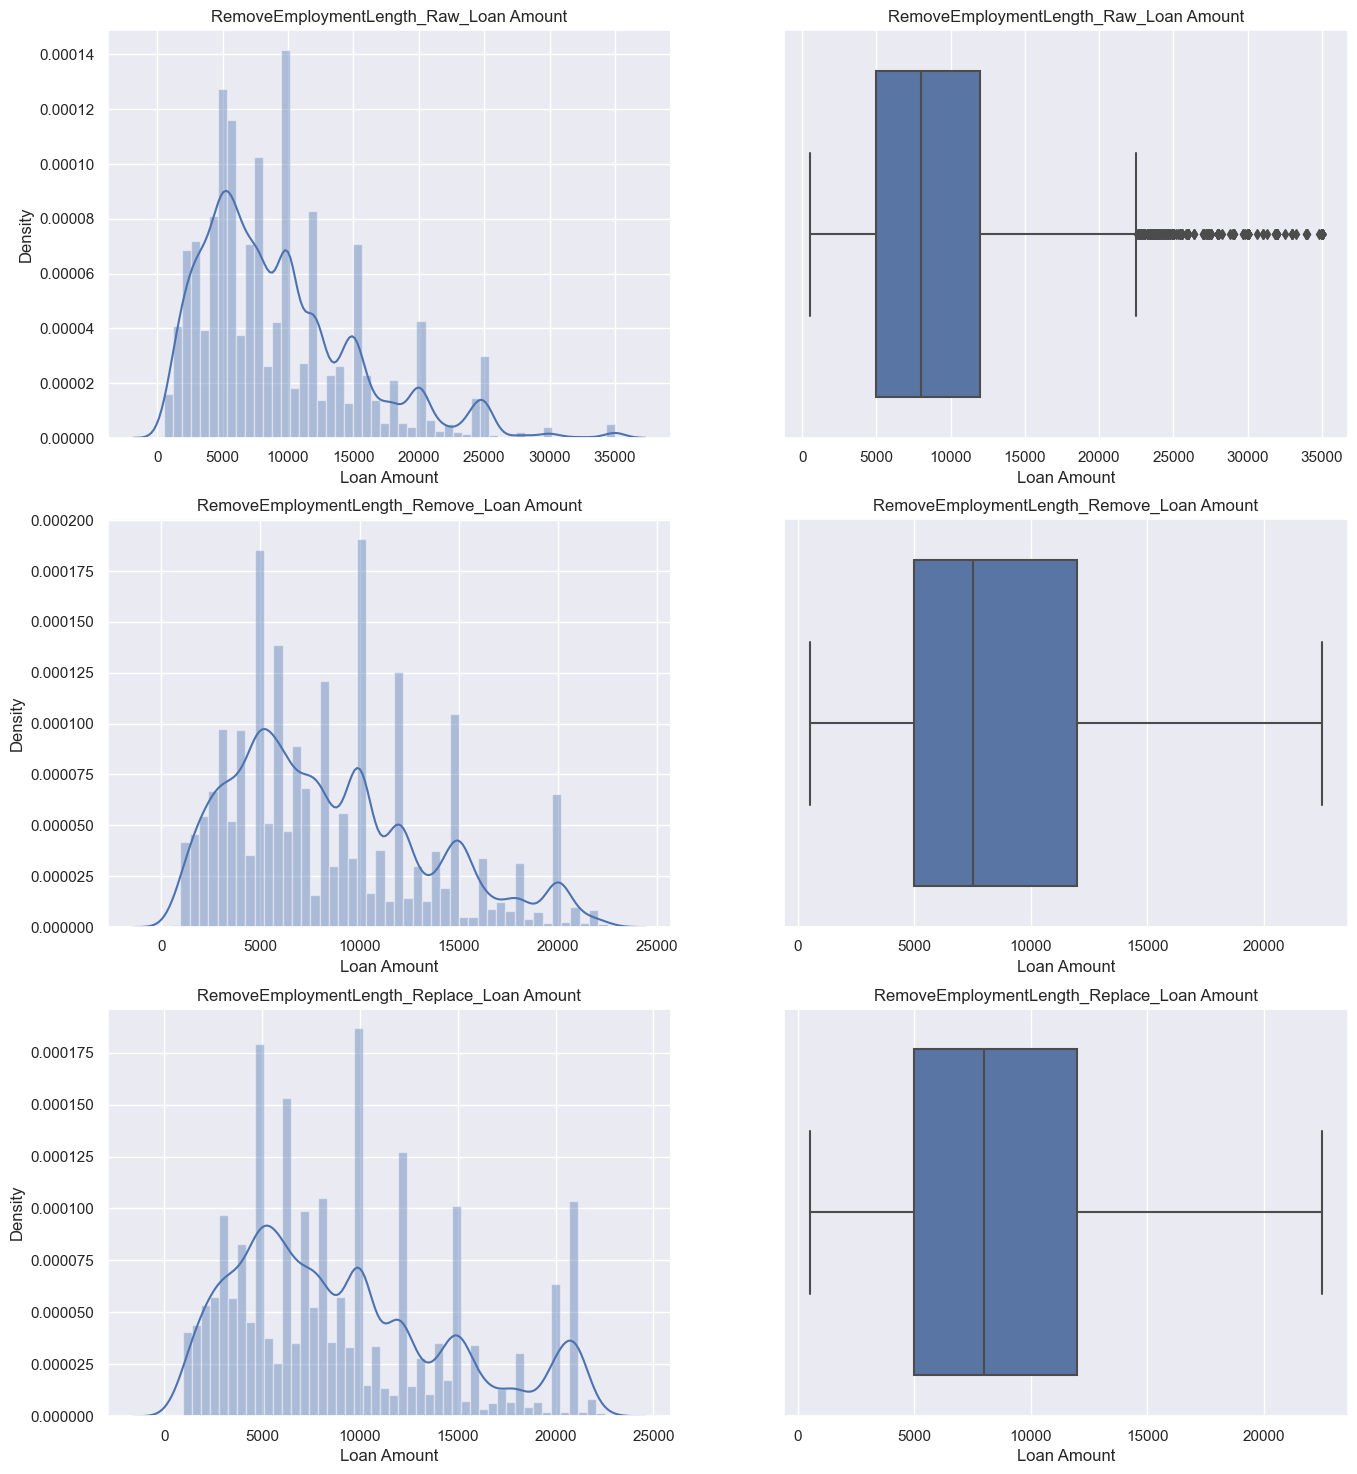

In [84]:
plt.figure(figsize=(16,18))
plt.subplot(3,2,1)
sns.distplot(file_RemoveEmploymentLength['Loan Amount']).set_title('RemoveEmploymentLength_Raw_Loan Amount')
plt.subplot(3,2,2)
sns.boxplot(file_RemoveEmploymentLength['Loan Amount']).set_title('RemoveEmploymentLength_Raw_Loan Amount')

plt.subplot(3,2,3)
sns.distplot(file_RemoveLoanAmount['Loan Amount']).set_title('RemoveEmploymentLength_Remove_Loan Amount')
plt.subplot(3,2,4)
sns.boxplot(file_RemoveLoanAmount['Loan Amount']).set_title('RemoveEmploymentLength_Remove_Loan Amount')

plt.subplot(3,2,5)
sns.distplot(file_ReplaceLoanAmount['Loan Amount']).set_title('RemoveEmploymentLength_Replace_Loan Amount')
plt.subplot(3,2,6)
sns.boxplot(file_ReplaceLoanAmount['Loan Amount']).set_title('RemoveEmploymentLength_Replace_Loan Amount')
plt.show()

Mortage = Loan Amount / Annual Income 

Mortage have to < 28%

After remove Loan Amount outlier:  Mortage around 14%
    
After replace Loan Amount outlier: Mortage around 15% 
    
Getting a lower interest rate can save you money over time.

Conclusion: we plan to choose remoce Loan Amount 

Remove the Loan Amount looks more make sense 

## check the shape of the file --------------------------------------
- to make sure we replace and remove work well

In [85]:
LoanAmount_Before_After = pd.DataFrame([['LoanAmount_Before', file_RemoveEmploymentLength.shape]],
                   columns = ['Column', 'Shape'])

LoanAmount_Remove = pd.DataFrame([['LoanAmount_Remove', file_RemoveLoanAmount.shape]],
                   columns = ['Column', 'Shape'])

LoanAmount_Before_After = LoanAmount_Before_After.append(LoanAmount_Remove, ignore_index = True)

LoanAmount_Replace = pd.DataFrame([['LoanAmount_Replace', file_ReplaceLoanAmount.shape]],
                   columns = ['Column', 'Shape'])

LoanAmount_Before_After = LoanAmount_Before_After.append(LoanAmount_Replace, ignore_index = True)
LoanAmount_Before_After

C:\Users\hojk8\AppData\Local\Temp\ipykernel_25216\3004435507.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  LoanAmount_Before_After = LoanAmount_Before_After.append(LoanAmount_Remove, ignore_index = True)
C:\Users\hojk8\AppData\Local\Temp\ipykernel_25216\3004435507.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  LoanAmount_Before_After = LoanAmount_Before_After.append(LoanAmount_Replace, ignore_index = True)


,Column,Shape
0,LoanAmount_Before,"(27944, 12)"
1,LoanAmount_Remove,"(26741, 12)"
2,LoanAmount_Replace,"(27944, 12)"


In [86]:
#Check all the value 
file_RemoveLoanAmount.to_excel("D:/Pilot/data/Loan_Default_Dataset/IQR/After/RemoveLoanAmount.xlsx", index=False)

## -----------------------------------------------------------------------------

In [87]:
#Interest rate
#follow the bank negara 

## -----------------------------------------------------------------------------

In [88]:
file_RemoveLoanAmount_to_PercentIncome = file_RemoveLoanAmount.copy()
file_RemoveLoanAmount_to_PercentIncome

,Id,Age,Annual Income,Home Ownership,Employment Length (in years),Loan Intent,Loan Grade,Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income,Historical Default
1,2,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N
2,3,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N
5,6,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N
9,10,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N
11,12,21,10000,OWN,2.0,HOMEIMPROVEMENT,A,4500,8.63,1,0.45,N
...,...,...,...,...,...,...,...,...,...,...,...,...
32573,32574,56,90000,MORTGAGE,0.0,PERSONAL,A,7200,6.17,0,0.08,N
32574,32575,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y
32575,32576,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N
32576,32577,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N


In [89]:
#Percent income was same as (Loan Amount / Annual Income)
#recalculate percent income using the (new Loan Amount / new Annual Income)
file_RemoveLoanAmount_to_PercentIncome['Percent Income'] = round(file_RemoveLoanAmount_to_PercentIncome['Loan Amount'] / file_RemoveLoanAmount_to_PercentIncome['Annual Income'],2)
file_RecalculatePercentIncome = file_RemoveLoanAmount_to_PercentIncome
file_RecalculatePercentIncome

,Id,Age,Annual Income,Home Ownership,Employment Length (in years),Loan Intent,Loan Grade,Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income,Historical Default
1,2,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N
2,3,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N
5,6,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N
9,10,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N
11,12,21,10000,OWN,2.0,HOMEIMPROVEMENT,A,4500,8.63,1,0.45,N
...,...,...,...,...,...,...,...,...,...,...,...,...
32573,32574,56,90000,MORTGAGE,0.0,PERSONAL,A,7200,6.17,0,0.08,N
32574,32575,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y
32575,32576,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N
32576,32577,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N


D:\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Downloads\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.w

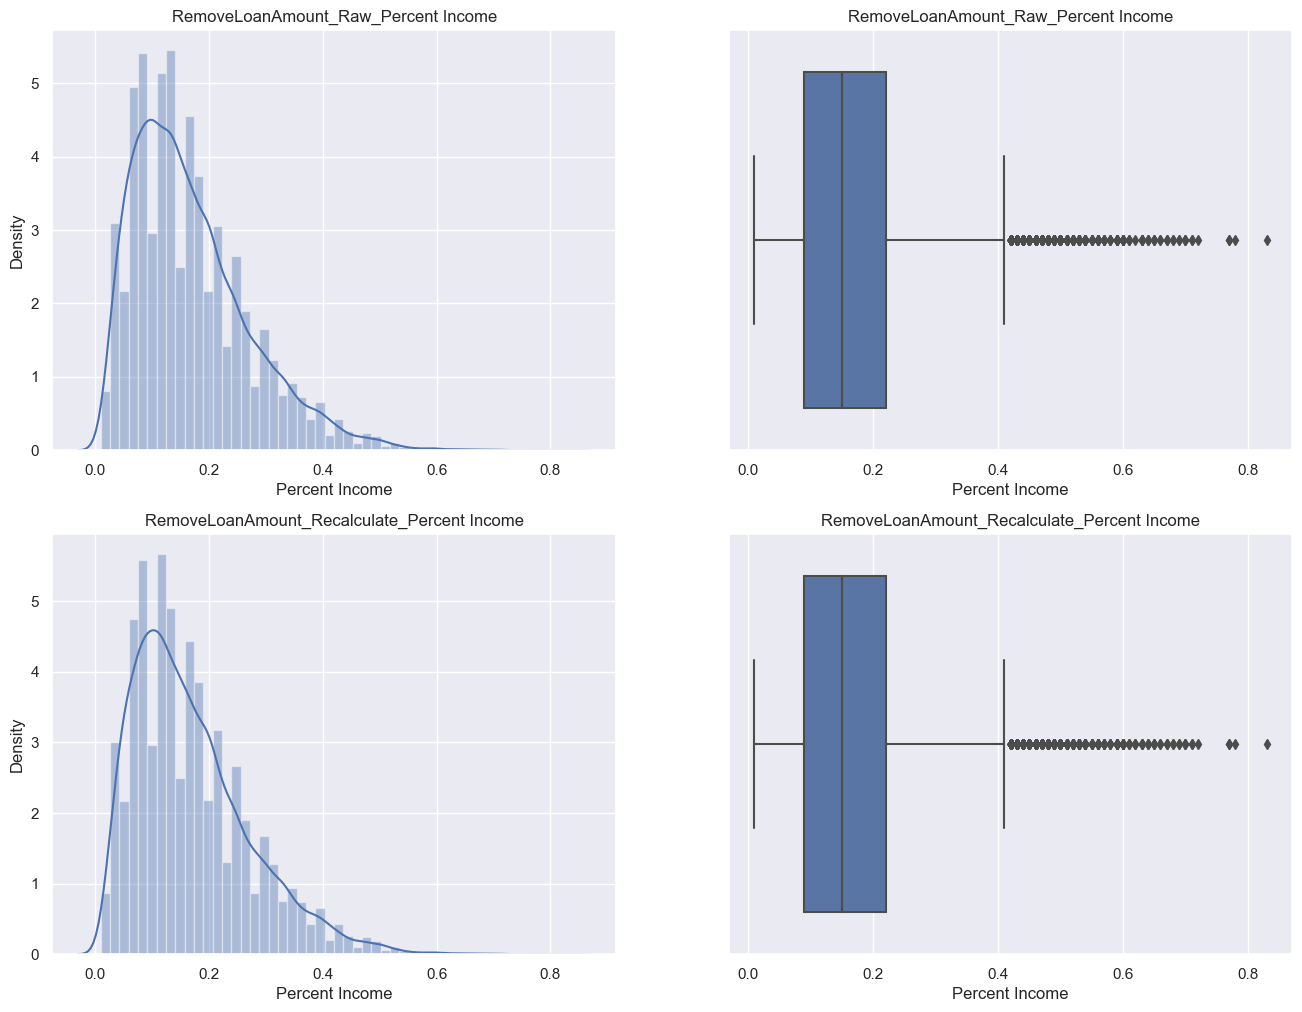

In [90]:
plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
sns.distplot(file_RemoveLoanAmount['Percent Income']).set_title('RemoveLoanAmount_Raw_Percent Income')
plt.subplot(2,2,2)
sns.boxplot(file_RemoveLoanAmount['Percent Income']).set_title('RemoveLoanAmount_Raw_Percent Income')

plt.subplot(2,2,3)
sns.distplot(file_RecalculatePercentIncome['Percent Income']).set_title('RemoveLoanAmount_Recalculate_Percent Income')
plt.subplot(2,2,4)
sns.boxplot(file_RecalculatePercentIncome['Percent Income']).set_title('RemoveLoanAmount_Recalculate_Percent Income')
plt.show()

In [91]:
#Check all the value 
file_RecalculatePercentIncome.to_excel("D:/Pilot/data/Loan_Default_Dataset/IQR/After/RecalculatePercentIncome.xlsx", index=False)

## -----------------------------------------------------------------------------

In [92]:
file_FinalClean = file_RecalculatePercentIncome
file_FinalClean

,Id,Age,Annual Income,Home Ownership,Employment Length (in years),Loan Intent,Loan Grade,Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income,Historical Default
1,2,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N
2,3,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N
5,6,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N
9,10,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N
11,12,21,10000,OWN,2.0,HOMEIMPROVEMENT,A,4500,8.63,1,0.45,N
...,...,...,...,...,...,...,...,...,...,...,...,...
32573,32574,56,90000,MORTGAGE,0.0,PERSONAL,A,7200,6.17,0,0.08,N
32574,32575,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y
32575,32576,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N
32576,32577,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N


In [93]:
#After replace all the outlier 
file_FinalClean.to_excel("D:/Pilot/data/Loan_Default_Dataset/IQR/After/Finalise_Clean.xlsx", index=False)

# Feature Engineering

In feature engineering, we apply domain expertise to produce new features from raw data, or we convert or encode features. We’ll encode categorical features or make dummy features out of them in this section.

A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables.

- we can use label encoding or dummy variable 
- but label encoding have to used in ranking 

In [94]:
file_FinalClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26741 entries, 1 to 32577
Data columns (total 12 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Id                                           26741 non-null  int64  
 1   Age                                          26741 non-null  int64  
 2   Annual Income                                26741 non-null  int64  
 3   Home Ownership                               26741 non-null  object 
 4   Employment Length (in years)                 26741 non-null  float64
 5   Loan Intent                                  26741 non-null  object 
 6   Loan Grade                                   26741 non-null  object 
 7   Loan Amount                                  26741 non-null  int64  
 8   Interest Rate                                26741 non-null  float64
 9   Loan Status (0 is non default 1 is default)  26741 non-null  int64  
 10

In [95]:
#list of columns
cols = file_FinalClean.select_dtypes(['object']).columns
#Create dummy variables
file_FinalClean_Dummy = pd.get_dummies(file_FinalClean[cols])
file_FinalClean_Dummy

,Home Ownership_MORTGAGE,Home Ownership_OTHER,Home Ownership_OWN,Home Ownership_RENT,Loan Intent_DEBTCONSOLIDATION,Loan Intent_EDUCATION,Loan Intent_HOMEIMPROVEMENT,Loan Intent_MEDICAL,Loan Intent_PERSONAL,Loan Intent_VENTURE,Loan Grade_A,Loan Grade_B,Loan Grade_C,Loan Grade_D,Loan Grade_E,Loan Grade_F,Loan Grade_G,Historical Default_N,Historical Default_Y
1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
5,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
9,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
11,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32573,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
32574,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
32575,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
32576,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [96]:
file_FinalClean_Dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26741 entries, 1 to 32577
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Home Ownership_MORTGAGE        26741 non-null  uint8
 1   Home Ownership_OTHER           26741 non-null  uint8
 2   Home Ownership_OWN             26741 non-null  uint8
 3   Home Ownership_RENT            26741 non-null  uint8
 4   Loan Intent_DEBTCONSOLIDATION  26741 non-null  uint8
 5   Loan Intent_EDUCATION          26741 non-null  uint8
 6   Loan Intent_HOMEIMPROVEMENT    26741 non-null  uint8
 7   Loan Intent_MEDICAL            26741 non-null  uint8
 8   Loan Intent_PERSONAL           26741 non-null  uint8
 9   Loan Intent_VENTURE            26741 non-null  uint8
 10  Loan Grade_A                   26741 non-null  uint8
 11  Loan Grade_B                   26741 non-null  uint8
 12  Loan Grade_C                   26741 non-null  uint8
 13  Loan Grade_D    

In [97]:
#concat dummy columns with original final dataframe
file_FinalClean_Dummy = pd.concat([file_FinalClean,file_FinalClean_Dummy],axis=1)
file_FinalClean_Dummy

,Id,Age,Annual Income,Home Ownership,Employment Length (in years),Loan Intent,Loan Grade,Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),...,Loan Intent_VENTURE,Loan Grade_A,Loan Grade_B,Loan Grade_C,Loan Grade_D,Loan Grade_E,Loan Grade_F,Loan Grade_G,Historical Default_N,Historical Default_Y
1,2,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,...,0,0,1,0,0,0,0,0,1,0
2,3,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,...,0,0,0,1,0,0,0,0,1,0
5,6,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,...,1,1,0,0,0,0,0,0,1,0
9,10,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,...,1,0,0,0,1,0,0,0,1,0
11,12,21,10000,OWN,2.0,HOMEIMPROVEMENT,A,4500,8.63,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32573,32574,56,90000,MORTGAGE,0.0,PERSONAL,A,7200,6.17,0,...,0,1,0,0,0,0,0,0,1,0
32574,32575,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,...,0,0,0,0,1,0,0,0,0,1
32575,32576,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,...,0,0,1,0,0,0,0,0,1,0
32576,32577,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,...,0,0,0,1,0,0,0,0,1,0


In [98]:
#drop cols
file_FinalClean_Dummy = file_FinalClean_Dummy.drop(cols,axis=1)
file_FinalClean_Dummy

,Id,Age,Annual Income,Employment Length (in years),Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income,Home Ownership_MORTGAGE,Home Ownership_OTHER,...,Loan Intent_VENTURE,Loan Grade_A,Loan Grade_B,Loan Grade_C,Loan Grade_D,Loan Grade_E,Loan Grade_F,Loan Grade_G,Historical Default_N,Historical Default_Y
1,2,21,9600,5.0,1000,11.14,0,0.10,0,0,...,0,0,1,0,0,0,0,0,1,0
2,3,25,9600,1.0,5500,12.87,1,0.57,1,0,...,0,0,0,1,0,0,0,0,1,0
5,6,21,9900,2.0,2500,7.14,1,0.25,0,0,...,1,1,0,0,0,0,0,0,1,0
9,10,21,10000,6.0,1600,14.74,1,0.16,0,0,...,1,0,0,0,1,0,0,0,1,0
11,12,21,10000,2.0,4500,8.63,1,0.45,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32573,32574,56,90000,0.0,7200,6.17,0,0.08,1,0,...,0,1,0,0,0,0,0,0,1,0
32574,32575,52,65004,4.0,20000,15.58,1,0.31,0,0,...,0,0,0,0,1,0,0,0,0,1
32575,32576,52,64500,0.0,5000,11.26,0,0.08,0,0,...,0,0,1,0,0,0,0,0,1,0
32576,32577,57,53000,1.0,5800,13.16,0,0.11,1,0,...,0,0,0,1,0,0,0,0,1,0


In [99]:
#check all value
file_FinalClean_Dummy.to_excel("D:/Pilot/data/Loan_Default_Dataset/IQR/After/Check_Dummy.xlsx", index=False)

In [100]:
#remove the column of Historical default_N
file_FinalDummy = file_FinalClean_Dummy.drop(['Historical Default_N'], axis=1)
file_FinalDummy

,Id,Age,Annual Income,Employment Length (in years),Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income,Home Ownership_MORTGAGE,Home Ownership_OTHER,...,Loan Intent_PERSONAL,Loan Intent_VENTURE,Loan Grade_A,Loan Grade_B,Loan Grade_C,Loan Grade_D,Loan Grade_E,Loan Grade_F,Loan Grade_G,Historical Default_Y
1,2,21,9600,5.0,1000,11.14,0,0.10,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,25,9600,1.0,5500,12.87,1,0.57,1,0,...,0,0,0,0,1,0,0,0,0,0
5,6,21,9900,2.0,2500,7.14,1,0.25,0,0,...,0,1,1,0,0,0,0,0,0,0
9,10,21,10000,6.0,1600,14.74,1,0.16,0,0,...,0,1,0,0,0,1,0,0,0,0
11,12,21,10000,2.0,4500,8.63,1,0.45,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32573,32574,56,90000,0.0,7200,6.17,0,0.08,1,0,...,1,0,1,0,0,0,0,0,0,0
32574,32575,52,65004,4.0,20000,15.58,1,0.31,0,0,...,1,0,0,0,0,1,0,0,0,1
32575,32576,52,64500,0.0,5000,11.26,0,0.08,0,0,...,0,0,0,1,0,0,0,0,0,0
32576,32577,57,53000,1.0,5800,13.16,0,0.11,1,0,...,1,0,0,0,1,0,0,0,0,0


In [101]:
file_FinalDummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26741 entries, 1 to 32577
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Id                                           26741 non-null  int64  
 1   Age                                          26741 non-null  int64  
 2   Annual Income                                26741 non-null  int64  
 3   Employment Length (in years)                 26741 non-null  float64
 4   Loan Amount                                  26741 non-null  int64  
 5   Interest Rate                                26741 non-null  float64
 6   Loan Status (0 is non default 1 is default)  26741 non-null  int64  
 7   Percent Income                               26741 non-null  float64
 8   Home Ownership_MORTGAGE                      26741 non-null  uint8  
 9   Home Ownership_OTHER                         26741 non-null  uint8  
 10

In [102]:
file_FinalDummy

,Id,Age,Annual Income,Employment Length (in years),Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income,Home Ownership_MORTGAGE,Home Ownership_OTHER,...,Loan Intent_PERSONAL,Loan Intent_VENTURE,Loan Grade_A,Loan Grade_B,Loan Grade_C,Loan Grade_D,Loan Grade_E,Loan Grade_F,Loan Grade_G,Historical Default_Y
1,2,21,9600,5.0,1000,11.14,0,0.10,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,25,9600,1.0,5500,12.87,1,0.57,1,0,...,0,0,0,0,1,0,0,0,0,0
5,6,21,9900,2.0,2500,7.14,1,0.25,0,0,...,0,1,1,0,0,0,0,0,0,0
9,10,21,10000,6.0,1600,14.74,1,0.16,0,0,...,0,1,0,0,0,1,0,0,0,0
11,12,21,10000,2.0,4500,8.63,1,0.45,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32573,32574,56,90000,0.0,7200,6.17,0,0.08,1,0,...,1,0,1,0,0,0,0,0,0,0
32574,32575,52,65004,4.0,20000,15.58,1,0.31,0,0,...,1,0,0,0,0,1,0,0,0,1
32575,32576,52,64500,0.0,5000,11.26,0,0.08,0,0,...,0,0,0,1,0,0,0,0,0,0
32576,32577,57,53000,1.0,5800,13.16,0,0.11,1,0,...,1,0,0,0,1,0,0,0,0,0


In [103]:
#Check the value
file_FinalDummy.to_excel("D:/Pilot/data/Loan_Default_Dataset/IQR/After/Finalise_Dummy.xlsx", index=False)

# Remove ID

since ID will not give any predictive function and we already clean all the data that we can, we have to remove ID so that our data will not affect by ID

In [104]:
file_Ready_Model = file_FinalDummy.drop(['Id'],axis=1)
file_Ready_Model

,Age,Annual Income,Employment Length (in years),Loan Amount,Interest Rate,Loan Status (0 is non default 1 is default),Percent Income,Home Ownership_MORTGAGE,Home Ownership_OTHER,Home Ownership_OWN,...,Loan Intent_PERSONAL,Loan Intent_VENTURE,Loan Grade_A,Loan Grade_B,Loan Grade_C,Loan Grade_D,Loan Grade_E,Loan Grade_F,Loan Grade_G,Historical Default_Y
1,21,9600,5.0,1000,11.14,0,0.10,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5,21,9900,2.0,2500,7.14,1,0.25,0,0,1,...,0,1,1,0,0,0,0,0,0,0
9,21,10000,6.0,1600,14.74,1,0.16,0,0,1,...,0,1,0,0,0,1,0,0,0,0
11,21,10000,2.0,4500,8.63,1,0.45,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32573,56,90000,0.0,7200,6.17,0,0.08,1,0,0,...,1,0,1,0,0,0,0,0,0,0
32574,52,65004,4.0,20000,15.58,1,0.31,0,0,0,...,1,0,0,0,0,1,0,0,0,1
32575,52,64500,0.0,5000,11.26,0,0.08,0,0,0,...,0,0,0,1,0,0,0,0,0,0
32576,57,53000,1.0,5800,13.16,0,0.11,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [105]:
#Check the value
file_Ready_Model.to_excel("D:/Pilot/data/Loan_Default_Dataset/IQR/After/File_Ready_Model.xlsx", index=False)

# Split data into Train-Test

In [106]:
#split data into dependent variables(X) and independent variable(y) that we would predict
X = file_Ready_Model.drop(['Loan Status (0 is non default 1 is default)'], axis=1)
y = file_Ready_Model['Loan Status (0 is non default 1 is default)']

#Let’s split X and y using Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.8)

#get shape of train and test data
print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)


train size X :  (21392, 24)
train size y :  (21392,)
test size X :  (5349, 24)
test size y :  (5349,)


In [107]:
#concat X and y of train data
train = pd.concat([y_train,X_train],axis=1)
train

,Loan Status (0 is non default 1 is default),Age,Annual Income,Employment Length (in years),Loan Amount,Interest Rate,Percent Income,Home Ownership_MORTGAGE,Home Ownership_OTHER,Home Ownership_OWN,...,Loan Intent_PERSONAL,Loan Intent_VENTURE,Loan Grade_A,Loan Grade_B,Loan Grade_C,Loan Grade_D,Loan Grade_E,Loan Grade_F,Loan Grade_G,Historical Default_Y
5392,0,23,38500,1.0,8450,10.62,0.22,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10270,0,24,73000,5.0,9600,13.92,0.13,0,0,0,...,0,0,0,0,1,0,0,0,0,1
12914,0,25,78500,2.0,12000,10.99,0.15,0,0,0,...,0,0,0,1,0,0,0,0,0,0
28759,1,27,20000,0.0,8000,11.89,0.40,0,0,0,...,0,1,0,1,0,0,0,0,0,0
8037,0,25,55000,1.0,2000,13.22,0.04,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25666,0,33,110000,3.0,12000,10.65,0.11,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6394,1,25,32000,9.0,6000,12.99,0.19,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1357,0,25,26004,3.0,10000,9.91,0.38,1,0,0,...,0,0,0,1,0,0,0,0,0,0
19122,0,30,18000,5.0,2400,11.49,0.13,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [108]:
#concat X and y of test data
test = pd.concat([y_test,X_test],axis=1)
test

,Loan Status (0 is non default 1 is default),Age,Annual Income,Employment Length (in years),Loan Amount,Interest Rate,Percent Income,Home Ownership_MORTGAGE,Home Ownership_OTHER,Home Ownership_OWN,...,Loan Intent_PERSONAL,Loan Intent_VENTURE,Loan Grade_A,Loan Grade_B,Loan Grade_C,Loan Grade_D,Loan Grade_E,Loan Grade_F,Loan Grade_G,Historical Default_Y
7299,0,22,30000,4.0,6500,13.85,0.22,0,0,0,...,0,0,0,0,1,0,0,0,0,1
10033,1,22,32400,6.0,9250,14.46,0.29,0,0,0,...,0,0,0,0,0,1,0,0,0,1
11775,0,22,83200,3.0,10000,16.29,0.12,0,0,0,...,0,0,0,0,0,1,0,0,0,0
11702,0,23,75000,0.0,10000,9.63,0.13,0,0,0,...,0,0,1,0,0,0,0,0,0,0
28636,0,28,81000,11.0,6000,6.17,0.07,1,0,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27178,0,28,125000,13.0,15000,10.25,0.12,1,0,0,...,0,1,0,1,0,0,0,0,0,0
30051,0,41,52000,2.0,5000,7.88,0.10,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5573,1,26,39000,4.0,5000,13.67,0.13,1,0,0,...,0,0,0,0,0,1,0,0,0,0
17550,0,24,29232,1.0,11000,11.71,0.38,1,0,0,...,0,1,0,1,0,0,0,0,0,0


In [109]:
#Check the value
# Write to Multiple Sheets
with pd.ExcelWriter('D:/Pilot/data/Loan_Default_Dataset/IQR/After/TrainFile.xlsx') as writer:
    X_train.to_excel(writer, sheet_name='trainX', index=False)
    y_train.to_excel(writer, sheet_name='trainY', index=False)
    train.to_excel(writer, sheet_name='CombineTrain', index=False)
    
with pd.ExcelWriter('D:/Pilot/data/Loan_Default_Dataset/IQR/After/TestFile.xlsx') as writer:
    X_test.to_excel(writer, sheet_name='testX', index=False)
    y_test.to_excel(writer, sheet_name='testY', index=False)
    test.to_excel(writer, sheet_name='CombineTest', index=False)
       

In [110]:
#check for distribution of labels
#to check the target variable still in class balance 
y_train.value_counts(normalize=True)

0    0.78319
1    0.21681
Name: Loan Status (0 is non default 1 is default), dtype: float64

In [111]:
#check for distribution of labels
#to check the target variable still in class balance 
y_test.value_counts(normalize=True)

0    0.782576
1    0.217424
Name: Loan Status (0 is non default 1 is default), dtype: float64

# Feature Scaling

used when we have features that vary greatly in magnitude, the algorithm assumes that features with a large magnitude are more relevant than those with a small magnitude.

In [112]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

The fit method of StandardScaler is used to estimate sample mean and standard deviation for each feature using training data. The transform method is then used to estimate the standardized value of features using those estimated parameters (mean & standard deviation).

In [113]:
X_train_std

array([[-0.76140478, -0.70150252, -0.94529024, ..., -0.07604646,
        -0.03747483, -0.4588055 ],
       [-0.59211755,  0.60781984,  0.09107963, ..., -0.07604646,
        -0.03747483,  2.17957281],
       [-0.42283031,  0.81655239, -0.68619777, ..., -0.07604646,
        -0.03747483, -0.4588055 ],
       ...,
       [-0.42283031, -1.17574288, -0.42710531, ..., -0.07604646,
        -0.03747483, -0.4588055 ],
       [ 0.42360584, -1.47950566,  0.09107963, ..., -0.07604646,
        -0.03747483, -0.4588055 ],
       [ 0.25431861,  0.11445199, -0.94529024, ..., -0.07604646,
        -0.03747483, -0.4588055 ]])

In [114]:
X_test_std

array([[-0.93069201, -1.02408919, -0.16801284, ..., -0.07604646,
        -0.03747483,  2.17957281],
       [-0.93069201, -0.9330059 ,  0.35017209, ..., -0.07604646,
        -0.03747483,  2.17957281],
       [-0.93069201,  0.99492384, -0.42710531, ..., -0.07604646,
        -0.03747483, -0.4588055 ],
       ...,
       [-0.25354308, -0.68252684, -0.16801284, ..., -0.07604646,
        -0.03747483, -0.4588055 ],
       [-0.59211755, -1.05323585, -0.94529024, ..., -0.07604646,
        -0.03747483, -0.4588055 ],
       [ 0.93146754,  0.87347945,  0.09107963, ..., -0.07604646,
        -0.03747483, -0.4588055 ]])

In [115]:
#convert data from array to dataframe
X_train = pd.DataFrame(X_train_std, columns = X_train.columns)
X_test = pd.DataFrame(X_test_std, columns = X_test.columns)

In [116]:
X_train

,Age,Annual Income,Employment Length (in years),Loan Amount,Interest Rate,Percent Income,Home Ownership_MORTGAGE,Home Ownership_OTHER,Home Ownership_OWN,Home Ownership_RENT,...,Loan Intent_PERSONAL,Loan Intent_VENTURE,Loan Grade_A,Loan Grade_B,Loan Grade_C,Loan Grade_D,Loan Grade_E,Loan Grade_F,Loan Grade_G,Historical Default_Y
0,-0.761405,-0.701503,-0.945290,-0.010428,-0.093764,0.507202,-0.799207,-0.055631,-0.297465,0.949568,...,-0.451922,-0.460298,-0.720038,1.479215,-0.505953,-0.346072,-0.166494,-0.076046,-0.037475,-0.458806
1,-0.592118,0.607820,0.091080,0.223821,0.934767,-0.370825,-0.799207,-0.055631,-0.297465,0.949568,...,-0.451922,-0.460298,-0.720038,-0.676034,1.976467,-0.346072,-0.166494,-0.076046,-0.037475,2.179573
2,-0.422830,0.816552,-0.686198,0.712689,0.021557,-0.175708,-0.799207,-0.055631,-0.297465,0.949568,...,-0.451922,-0.460298,-0.720038,1.479215,-0.505953,-0.346072,-0.166494,-0.076046,-0.037475,-0.458806
3,-0.084256,-1.403603,-1.204383,-0.102091,0.302065,2.263256,-0.799207,-0.055631,-0.297465,0.949568,...,-0.451922,2.172507,-0.720038,1.479215,-0.505953,-0.346072,-0.166494,-0.076046,-0.037475,-0.458806
4,-0.422830,-0.075305,-0.945290,-1.324260,0.716594,-1.248851,1.251241,-0.055631,-0.297465,-1.053110,...,-0.451922,-0.460298,-0.720038,-0.676034,1.976467,-0.346072,-0.166494,-0.076046,-0.037475,-0.458806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21387,0.931468,2.012021,-0.427105,0.712689,-0.084413,-0.565942,-0.799207,-0.055631,-0.297465,0.949568,...,-0.451922,-0.460298,-0.720038,1.479215,-0.505953,-0.346072,-0.166494,-0.076046,-0.037475,-0.458806
21388,-0.422830,-0.948186,1.127449,-0.509481,0.644909,0.214527,-0.799207,-0.055631,-0.297465,0.949568,...,-0.451922,-0.460298,-0.720038,-0.676034,1.976467,-0.346072,-0.166494,-0.076046,-0.037475,2.179573
21389,-0.422830,-1.175743,-0.427105,0.305299,-0.315054,2.068139,1.251241,-0.055631,-0.297465,-1.053110,...,-0.451922,-0.460298,-0.720038,1.479215,-0.505953,-0.346072,-0.166494,-0.076046,-0.037475,-0.458806
21390,0.423606,-1.479506,0.091080,-1.242782,0.177395,-0.370825,-0.799207,-0.055631,-0.297465,0.949568,...,-0.451922,-0.460298,-0.720038,1.479215,-0.505953,-0.346072,-0.166494,-0.076046,-0.037475,-0.458806


In [117]:
X_test

,Age,Annual Income,Employment Length (in years),Loan Amount,Interest Rate,Percent Income,Home Ownership_MORTGAGE,Home Ownership_OTHER,Home Ownership_OWN,Home Ownership_RENT,...,Loan Intent_PERSONAL,Loan Intent_VENTURE,Loan Grade_A,Loan Grade_B,Loan Grade_C,Loan Grade_D,Loan Grade_E,Loan Grade_F,Loan Grade_G,Historical Default_Y
0,-0.930692,-1.024089,-0.168013,-0.407633,0.912950,0.507202,-0.799207,-0.055631,-0.297465,0.949568,...,-0.451922,-0.460298,-0.720038,-0.676034,1.976467,-0.346072,-0.166494,-0.076046,-0.037475,2.179573
1,-0.930692,-0.933006,0.350172,0.152528,1.103073,1.190112,-0.799207,-0.055631,-0.297465,0.949568,...,-0.451922,-0.460298,-0.720038,-0.676034,-0.505953,2.889576,-0.166494,-0.076046,-0.037475,2.179573
2,-0.930692,0.994924,-0.427105,0.305299,1.673440,-0.468383,-0.799207,-0.055631,-0.297465,0.949568,...,-0.451922,-0.460298,-0.720038,-0.676034,-0.505953,2.889576,-0.166494,-0.076046,-0.037475,-0.458806
3,-0.761405,0.683723,-1.204383,0.305299,-0.402323,-0.370825,-0.799207,-0.055631,-0.297465,0.949568,...,-0.451922,-0.460298,1.388815,-0.676034,-0.505953,-0.346072,-0.166494,-0.076046,-0.037475,-0.458806
4,0.085031,0.911431,1.645634,-0.509481,-1.480722,-0.956176,1.251241,-0.055631,-0.297465,-1.053110,...,2.212772,-0.460298,1.388815,-0.676034,-0.505953,-0.346072,-0.166494,-0.076046,-0.037475,-0.458806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5344,0.085031,2.581291,2.163819,1.323773,-0.209084,-0.468383,1.251241,-0.055631,-0.297465,-1.053110,...,-0.451922,2.172507,-0.720038,1.479215,-0.505953,-0.346072,-0.166494,-0.076046,-0.037475,-0.458806
5345,2.285765,-0.189159,-0.686198,-0.713176,-0.947756,-0.663500,-0.799207,-0.055631,-0.297465,0.949568,...,-0.451922,-0.460298,1.388815,-0.676034,-0.505953,-0.346072,-0.166494,-0.076046,-0.037475,-0.458806
5346,-0.253543,-0.682527,-0.168013,-0.713176,0.856848,-0.370825,1.251241,-0.055631,-0.297465,-1.053110,...,-0.451922,-0.460298,-0.720038,-0.676034,-0.505953,2.889576,-0.166494,-0.076046,-0.037475,-0.458806
5347,-0.592118,-1.053236,-0.945290,0.508994,0.245963,2.068139,1.251241,-0.055631,-0.297465,-1.053110,...,-0.451922,2.172507,-0.720038,1.479215,-0.505953,-0.346072,-0.166494,-0.076046,-0.037475,-0.458806


# Build and Train Logistic Regression model

In [118]:
# train model to learn relationships between input and output variables
lr_DefaultModel = LogisticRegression(random_state=0)
lr_DefaultModel = lr_DefaultModel.fit(X_train,y_train)

y_pred_train = lr_DefaultModel.predict(X_train)
print("Predicted train X: ", y_pred_train)
y_pred_test = lr_DefaultModel.predict(X_test)
print("Predicted test X: ", y_pred_test)

Predicted train X:  [0 0 0 ... 1 0 0]
Predicted test X:  [0 1 0 ... 1 0 0]


After training our model on the training dataset, we used our model to predict values for the test dataset and recorded them in the y_pred_basemodel variable.

In [119]:
#Intercept of the model
print(lr_DefaultModel.intercept_)
Intercept = str(lr_DefaultModel.intercept_) + "(Intercept)"
print(Intercept)

[-1.94466484]
[-1.94466484](Intercept)


In [120]:
#coeficient
print(lr_DefaultModel.coef_)

[[-0.04027836  0.12122624 -0.06196182 -0.95437856  0.28875627  1.66948701
  -0.03211907  0.01185823 -0.54847813  0.33023485  0.16050536 -0.13919614
   0.22073188  0.09564076 -0.03726724 -0.24961406 -0.24246797 -0.18285776
  -0.1212549   0.56358852  0.33702893  0.16252854  0.20295441  0.01378774]]


In [121]:
colNameInFileReadyModel = file_Ready_Model.drop(['Loan Status (0 is non default 1 is default)'], axis=1)
colNameInFileReadyModel = list(colNameInFileReadyModel.columns)
print(colNameInFileReadyModel)
print("\nTotal length of list:" , len(colNameInFileReadyModel))

['Age', 'Annual Income', 'Employment Length (in years)', 'Loan Amount', 'Interest Rate', 'Percent Income', 'Home Ownership_MORTGAGE', 'Home Ownership_OTHER', 'Home Ownership_OWN', 'Home Ownership_RENT', 'Loan Intent_DEBTCONSOLIDATION', 'Loan Intent_EDUCATION', 'Loan Intent_HOMEIMPROVEMENT', 'Loan Intent_MEDICAL', 'Loan Intent_PERSONAL', 'Loan Intent_VENTURE', 'Loan Grade_A', 'Loan Grade_B', 'Loan Grade_C', 'Loan Grade_D', 'Loan Grade_E', 'Loan Grade_F', 'Loan Grade_G', 'Historical Default_Y']

Total length of list: 24


In [122]:
for p in range(0, 24):
    print(" + [" + str(lr_DefaultModel.coef_[0][p]) +"]" + " (" + str(colNameInFileReadyModel[p]) + ")")
    p = p+1

 + [-0.04027836295235573] (Age)
 + [0.12122623768309522] (Annual Income)
 + [-0.06196182101996761] (Employment Length (in years))
 + [-0.9543785583036806] (Loan Amount)
 + [0.28875626884339706] (Interest Rate)
 + [1.6694870105632733] (Percent Income)
 + [-0.03211907397167836] (Home Ownership_MORTGAGE)
 + [0.011858230541731286] (Home Ownership_OTHER)
 + [-0.548478133331157] (Home Ownership_OWN)
 + [0.33023485136710334] (Home Ownership_RENT)
 + [0.16050535996842294] (Loan Intent_DEBTCONSOLIDATION)
 + [-0.139196140132124] (Loan Intent_EDUCATION)
 + [0.22073187623733484] (Loan Intent_HOMEIMPROVEMENT)
 + [0.09564076131284661] (Loan Intent_MEDICAL)
 + [-0.03726723724650505] (Loan Intent_PERSONAL)
 + [-0.24961405938796605] (Loan Intent_VENTURE)
 + [-0.242467968715692] (Loan Grade_A)
 + [-0.18285776419001568] (Loan Grade_B)
 + [-0.12125490130186527] (Loan Grade_C)
 + [0.5635885217359633] (Loan Grade_D)
 + [0.3370289301506637] (Loan Grade_E)
 + [0.16252854495242286] (Loan Grade_F)
 + [0.2029544

In [123]:
#y = intercept + coeficient 

# Model Evaluation Metrics

In [124]:
#confusion matrix for train data
TrainConfusionMatrix = confusion_matrix(y_train,y_pred_train)
TrainConfusionMatrix

array([[15967,   787],
       [ 1988,  2650]], dtype=int64)

D:\Downloads\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


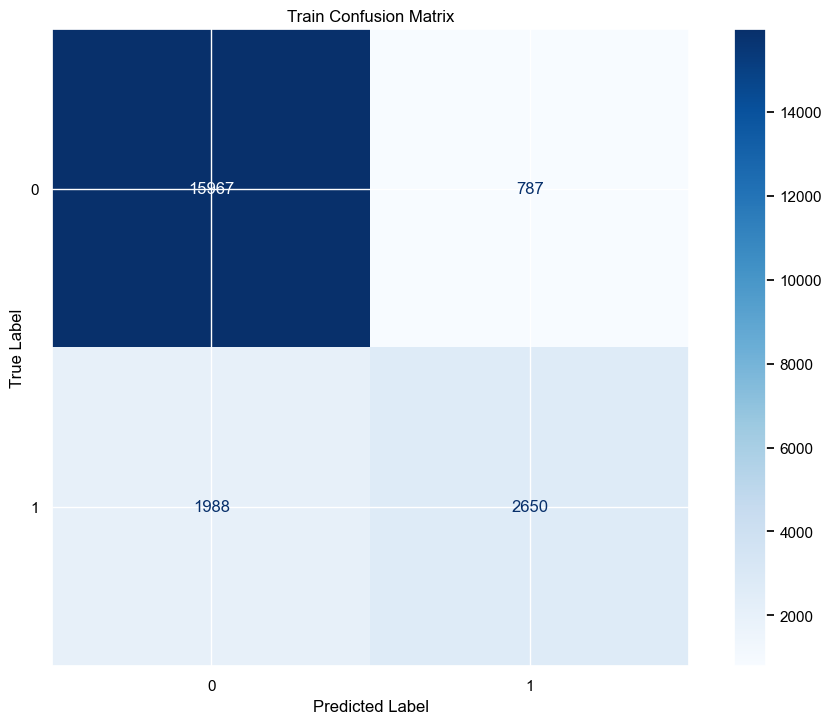

In [125]:
#plot the confusion matrix for train data 
color = 'black'
matrix = plot_confusion_matrix(lr_DefaultModel, X_train, y_train, cmap=plt.cm.Blues)
matrix.ax_.set_title('Train Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

## -----------------------------------------------------------------------------

In [126]:
#Run the classification report for train data
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     16754
           1       0.77      0.57      0.66      4638

    accuracy                           0.87     21392
   macro avg       0.83      0.76      0.79     21392
weighted avg       0.86      0.87      0.86     21392



In [127]:
acc = accuracy_score(y_train, y_pred_train)
prec = precision_score(y_train, y_pred_train)
rec = recall_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)

results = pd.DataFrame([['Logistic Regression (Lasso) Train', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso) Train,0.870279,0.771021,0.571367,0.656347


## -----------------------------------------------------------------------------

D:\Downloads\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


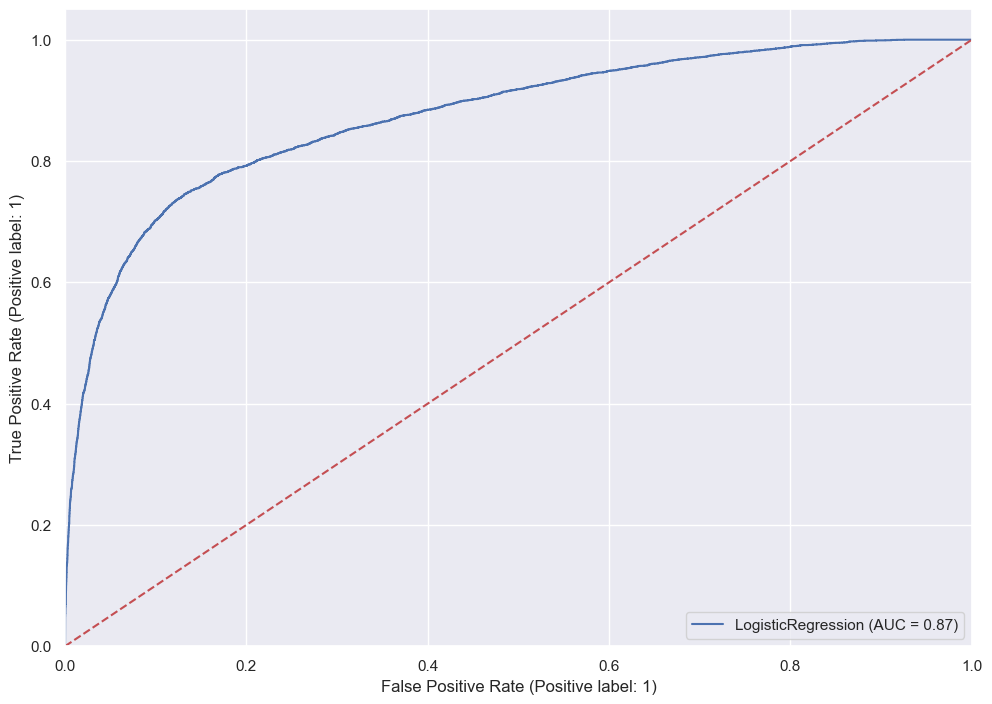

In [128]:
#ROC curve for train data
metrics.plot_roc_curve(lr_DefaultModel, X_train, y_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

## ===========================================

In [129]:
#confusion matrix for test data
ConfusionMatrix = confusion_matrix(y_test,y_pred_test)
ConfusionMatrix

array([[3979,  207],
       [ 515,  648]], dtype=int64)

D:\Downloads\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


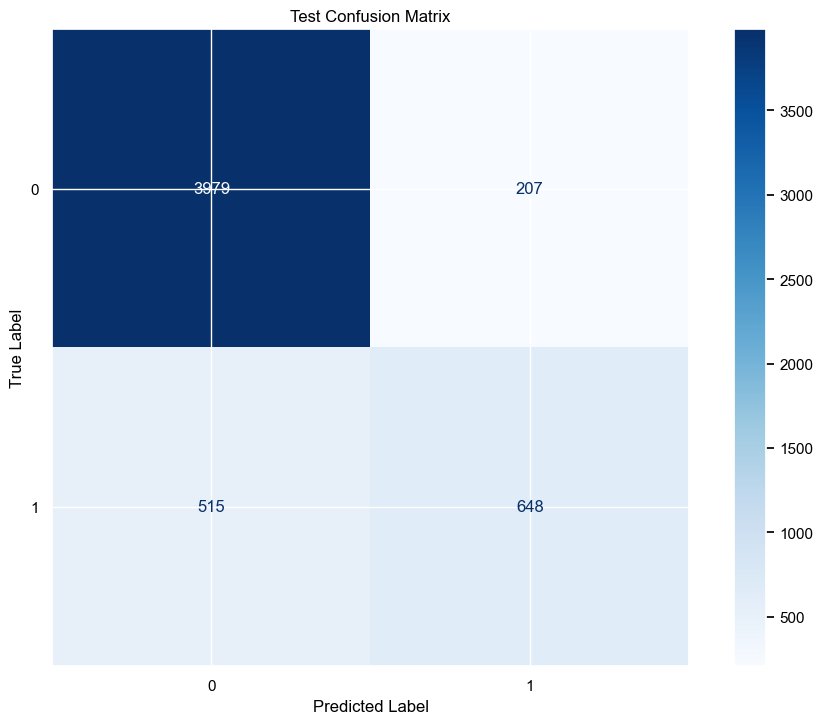

In [130]:
#plot the confusion matrix for test data 
color = 'black'
matrix = plot_confusion_matrix(lr_DefaultModel, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Test Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

## -----------------------------------------------------------------------------

In [131]:
#Run the classification report for test data
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4186
           1       0.76      0.56      0.64      1163

    accuracy                           0.87      5349
   macro avg       0.82      0.75      0.78      5349
weighted avg       0.86      0.87      0.86      5349



In [132]:
acc = accuracy_score(y_test, y_pred_test)
prec = precision_score(y_test, y_pred_test)
rec = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

resultsTest = pd.DataFrame([['Logistic Regression (Lasso) Test', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(resultsTest, ignore_index = True)
results

C:\Users\hojk8\AppData\Local\Temp\ipykernel_25216\3832889150.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(resultsTest, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso) Train,0.870279,0.771021,0.571367,0.656347
1,Logistic Regression (Lasso) Test,0.865021,0.757895,0.557180,0.642220


## -----------------------------------------------------------------------------

D:\Downloads\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


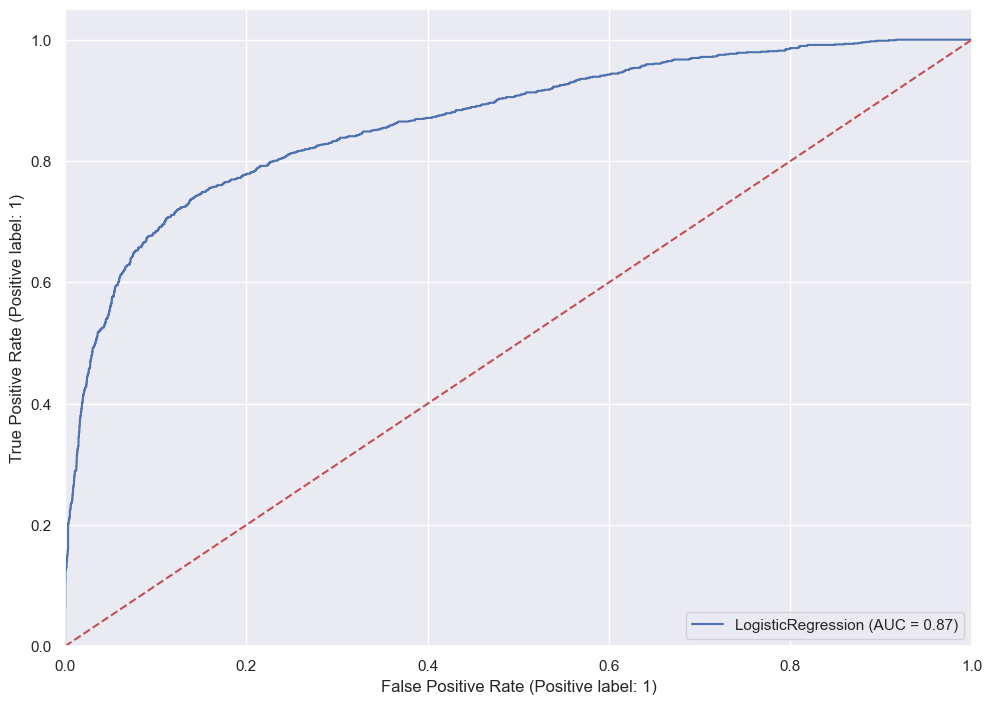

In [133]:
#ROC curve for test data
metrics.plot_roc_curve(lr_DefaultModel, X_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

- since the classification report for train and test is about the same, our calculation is consider correct because we devide data into train and test just to validate we do the right thing 
- we can still improve our model 

# Feature Selection (Recursive Feature Elimination)

- which factor is the best to select, then only run logistic regression
- Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [134]:
rfe = RFE(lr_DefaultModel, n_features_to_select= None)
rfe = rfe.fit(X_train, y_train)

#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
rfeCol = X_train.columns[rfe.support_]
print("\nColumns selected: ", rfeCol)
print("\nTotal columns selected: ", rfe.n_features_)

[False False False  True  True  True False False  True  True  True False
  True  True False False False False False  True  True  True  True False]
[10  7  9  1  1  1  3 13  1  1  1  8  1  1 11  2  4  5  6  1  1  1  1 12]

Columns selected:  Index(['Loan Amount', 'Interest Rate', 'Percent Income', 'Home Ownership_OWN',
       'Home Ownership_RENT', 'Loan Intent_DEBTCONSOLIDATION',
       'Loan Intent_HOMEIMPROVEMENT', 'Loan Intent_MEDICAL', 'Loan Grade_D',
       'Loan Grade_E', 'Loan Grade_F', 'Loan Grade_G'],
      dtype='object')

Total columns selected:  12


In [135]:
# Fitting Model to the Training Set
lr_RFEModel = LogisticRegression(random_state=0)
X_trainRFE = X_train[rfeCol]
X_testRFE = X_test[rfeCol]
lr_RFEModel.fit(X_trainRFE, y_train)

# Predicting Test Set
y_pred_rfe_train = lr_RFEModel.predict(X_trainRFE)
y_pred_rfe_test = lr_RFEModel.predict(X_testRFE)

In [136]:
#Check the value
# Write to Multiple Sheets
with pd.ExcelWriter('D:/Pilot/data/Loan_Default_Dataset/IQR/After/RFE_TrainFile.xlsx') as writer:
    X_trainRFE.to_excel(writer, sheet_name='trainX', index=False)
    y_train.to_excel(writer, sheet_name='trainY', index=False)
    
with pd.ExcelWriter('D:/Pilot/data/Loan_Default_Dataset/IQR/After/RFE_TestFile.xlsx') as writer:
    X_testRFE.to_excel(writer, sheet_name='testX', index=False)
    y_test.to_excel(writer, sheet_name='testY', index=False)
  

## -----------------------------------------------------------------------------

In [137]:
#RFE confusion matrix for train data 
RFETrainConfusionMatrix = confusion_matrix(y_train,y_pred_rfe_train)
RFETrainConfusionMatrix

array([[15971,   783],
       [ 1994,  2644]], dtype=int64)

#plot the confusion matrix 
color = 'black'
matrix = plot_confusion_matrix(lr_RFEModel, X_train.columns[rfe.support_], y_train, cmap=plt.cm.Blues)
matrix.ax_.set_title('Train Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [138]:
#Run the classification report 
print(classification_report(y_train,y_pred_rfe_train))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     16754
           1       0.77      0.57      0.66      4638

    accuracy                           0.87     21392
   macro avg       0.83      0.76      0.79     21392
weighted avg       0.86      0.87      0.86     21392



In [139]:
acc = accuracy_score(y_train,y_pred_rfe_train)
prec = precision_score(y_train,y_pred_rfe_train)
rec = recall_score(y_train,y_pred_rfe_train)
f1 = f1_score(y_train,y_pred_rfe_train)

resultsRFETrain = pd.DataFrame([['Logistic Regression (Lasso) RFE Train', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(resultsRFETrain, ignore_index = True)
results


C:\Users\hojk8\AppData\Local\Temp\ipykernel_25216\1783447671.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(resultsRFETrain, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso) Train,0.870279,0.771021,0.571367,0.656347
1,Logistic Regression (Lasso) Test,0.865021,0.757895,0.557180,0.642220
2,Logistic Regression (Lasso) RFE Train,0.870185,0.771520,0.570073,0.655673


metrics.plot_roc_curve(lr_DefaultModel, X_train.columns[rfe.support_], y_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

## ===========================================

In [140]:
#RFE confusion matrix for test data 
RFETestConfusionMatrix = confusion_matrix(y_test,y_pred_rfe_test)
RFETestConfusionMatrix

array([[3989,  197],
       [ 527,  636]], dtype=int64)

#plot the confusion matrix 
color = 'black'
matrix = plot_confusion_matrix(lr_DefaultModel, X_train.columns[rfe.support_], y_train, cmap=plt.cm.Blues)
matrix.ax_.set_title('Train Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [141]:
#Run the classification report 
print(classification_report(y_test,y_pred_rfe_test))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      4186
           1       0.76      0.55      0.64      1163

    accuracy                           0.86      5349
   macro avg       0.82      0.75      0.78      5349
weighted avg       0.86      0.86      0.86      5349



In [142]:
acc = accuracy_score(y_test,y_pred_rfe_test)
prec = precision_score(y_test,y_pred_rfe_test)
rec = recall_score(y_test,y_pred_rfe_test)
f1 = f1_score(y_test,y_pred_rfe_test)

resultsRFETest = pd.DataFrame([['Logistic Regression (Lasso) RFE Test', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(resultsRFETest, ignore_index = True)
results


C:\Users\hojk8\AppData\Local\Temp\ipykernel_25216\4207745275.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(resultsRFETest, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso) Train,0.870279,0.771021,0.571367,0.656347
1,Logistic Regression (Lasso) Test,0.865021,0.757895,0.557180,0.642220
2,Logistic Regression (Lasso) RFE Train,0.870185,0.771520,0.570073,0.655673
3,Logistic Regression (Lasso) RFE Test,0.864648,0.763505,0.546862,0.637275


From the classification report, we clearly see that the accuracy for full model's training and testing data is higher than the RFE model's training and testing data. 

We can perform goodness of fit to see which model is the best model.

metrics.plot_roc_curve(lr_DefaultModel, X_train.columns[rfe.support_], y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

# Diagnostics / Goodness of Fit

- Is the model any good? 
- How well does the model fit the data? 
- Which predictors are most important? Are the predictions accurate?
- how well a model fits a given set of data, or how well it will predict a future set of observations.

## -----------------------------------------------------------------------------

##### Log Loss Ratio Test
Log loss, aka logistic loss or cross-entropy loss.

This is the loss function used in (multinomial) logistic regression and extensions of it such as neural networks, defined as the negative log-likelihood of a logistic model that returns y_pred probabilities for its training data y_true. The log loss is only defined for two or more labels. 

The log-likelihood was represent the higher the log-likelihood, the better a model fits a dataset.

However, since the Log loss functions defined as the negative log-likelihood, means the lower the log-loss, the better the performance of the model.

In [143]:
#calculate the log-likelihood of the model for full model 
full_LogLoss = log_loss(y_test, y_pred_test)
print("Full model's log-loss: ", full_LogLoss)

Full model's log-loss:  4.662023195698928


In [144]:
#calculate the log-likelihood of the model for RFE model 
RFE_LogLoss = log_loss(y_test,y_pred_rfe_test)
print("RFE model's log-loss: ", RFE_LogLoss)

RFE model's log-loss:  4.674935806806709


In [145]:
#Perform the Log-Likelihood Test

#calculate likelihood ratio Chi-Squared test statistic
LikelossRatio_statistic = -2*(RFE_LogLoss-full_LogLoss)
print("Chi-Squared test-statistic: ", LikelossRatio_statistic)

#calculate p-value of test statistic using 2 degrees of freedom
p_value = scipy.stats.chi2.sf(LikelossRatio_statistic, 2)
#We used 2 degrees of freedom when calculating the p-value 
#because this represented the difference between 
#the total predictor variables used between the two models.

print("P-value: ", p_value)

Chi-Squared test-statistic:  -0.025825222215562604
P-value:  1.0


H0 = The full model and the RFE model fit the data equally well

H1 = The full model and the RFE model fit the data are different


Since p-value > 0.05, we do not reject H0 and conclude that the full model and the RFE model fit the data equally well.

Besides, the lower the log-loss, the better the performance of the model.

Hence, we should use the full model the log-loss in full model is slightly higher than log loss in RFE model.

## ----------------------------------------------------------------------------

##### Pseudo R^2

In ordinary least square (OLS) regression, the R Square statistics measures the amount of variance explained by the regression model. The value of R Square ranges in 0 and 1, with a larger value indicating more variance is explained by the model (higher value is better). 

In [146]:
#Efron’s R^2
def efron_rsquare(y, y_pred):
    n = float(len(y))
    t1 = np.sum(np.power(y - y_pred, 2.0))
    t2 = np.sum(np.power((y - (np.sum(y) / n)), 2.0))
    return 1.0 - (t1 / t2)

In [147]:
full_EfronR2 = efron_rsquare(y_test, y_pred_test)
print("Full model's Efron's R Square: ", full_EfronR2)

Full model's Efron's R Square:  0.206712051266988


In [148]:
RFE_EfronR2 = efron_rsquare(y_test,y_pred_rfe_test)
print("RFE model's Efron's R Square: ", RFE_EfronR2)

RFE model's Efron's R Square:  0.2045145777247913


The measure ranges from 0 to just under 1, with values closer to zero indicating that the model has no predictive power.

Hence, the higher pseudo R-squared indicates which model better predicts the outcome. 

Hence, we should use the full model  from theperformance of R Square because the R Squared in full model is slightly higher than the R Squared in RFE model.

# Feature Selection (Recursive Feature Elimination Cross Validation)

Since RFE look like not working on our model as shown as above, those method of Goodness of Fit showing full model has better performance than the RFE model. 

In [149]:
#step = 1 = default
#cv = Determines the cross-validation splitting strategy.

rfecv = RFECV(lr_DefaultModel, step=1, cv=5)
rfecv = rfecv.fit(X_train, y_train)

#Summarize the selection of the attributes
print(rfecv.support_)
print(rfecv.ranking_)
rfecvCol = X_train.columns[rfecv.support_]
print("\nColumns selected: ", rfecvCol)
print("\nTotal columns selected: ", rfecv.n_features_)

[False  True  True  True  True  True  True False  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True False]
[2 1 1 1 1 1 1 5 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 4]

Columns selected:  Index(['Annual Income', 'Employment Length (in years)', 'Loan Amount',
       'Interest Rate', 'Percent Income', 'Home Ownership_MORTGAGE',
       'Home Ownership_OWN', 'Home Ownership_RENT',
       'Loan Intent_DEBTCONSOLIDATION', 'Loan Intent_EDUCATION',
       'Loan Intent_HOMEIMPROVEMENT', 'Loan Intent_MEDICAL',
       'Loan Intent_VENTURE', 'Loan Grade_A', 'Loan Grade_B', 'Loan Grade_C',
       'Loan Grade_D', 'Loan Grade_E', 'Loan Grade_F', 'Loan Grade_G'],
      dtype='object')

Total columns selected:  20


In [150]:
# Fitting Model to the Training Set
lr_RFEModel = LogisticRegression(random_state=0)
X_trainRFECV = X_train[rfecvCol]
X_testRFECV = X_test[rfecvCol]
lr_RFEModel.fit(X_trainRFECV, y_train)

# Predicting Test Set
y_pred_rfecv_train = lr_RFEModel.predict(X_trainRFECV)
y_pred_rfecv_test = lr_RFEModel.predict(X_testRFECV)

In [151]:
#Check the value
# Write to Multiple Sheets
with pd.ExcelWriter('D:/Pilot/data/Loan_Default_Dataset/IQR/After/RFECV_TrainFile.xlsx') as writer:
    X_trainRFE.to_excel(writer, sheet_name='trainX', index=False)
    y_train.to_excel(writer, sheet_name='trainY', index=False)
    
with pd.ExcelWriter('D:/Pilot/data/Loan_Default_Dataset/IQR/After/RFECV_TestFile.xlsx') as writer:
    X_testRFE.to_excel(writer, sheet_name='testX', index=False)
    y_test.to_excel(writer, sheet_name='testY', index=False)
  

## -----------------------------------------------------------------------------

In [152]:
#RFE confusion matrix for train data 
RFECVTrainConfusionMatrix = confusion_matrix(y_train,y_pred_rfecv_train)
RFECVTrainConfusionMatrix

array([[15967,   787],
       [ 1987,  2651]], dtype=int64)

In [153]:
#Run the classification report 
print(classification_report(y_train,y_pred_rfecv_train))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     16754
           1       0.77      0.57      0.66      4638

    accuracy                           0.87     21392
   macro avg       0.83      0.76      0.79     21392
weighted avg       0.86      0.87      0.86     21392



In [154]:
acc = accuracy_score(y_train,y_pred_rfecv_train)
prec = precision_score(y_train,y_pred_rfecv_train)
rec = recall_score(y_train,y_pred_rfecv_train)
f1 = f1_score(y_train,y_pred_rfecv_train)

resultsRFECVTrain = pd.DataFrame([['Logistic Regression (Lasso) RFECV Train', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(resultsRFECVTrain, ignore_index = True)
results


C:\Users\hojk8\AppData\Local\Temp\ipykernel_25216\4141171623.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(resultsRFECVTrain, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso) Train,0.870279,0.771021,0.571367,0.656347
1,Logistic Regression (Lasso) Test,0.865021,0.757895,0.557180,0.642220
2,Logistic Regression (Lasso) RFE Train,0.870185,0.771520,0.570073,0.655673
3,Logistic Regression (Lasso) RFE Test,0.864648,0.763505,0.546862,0.637275
4,Logistic Regression (Lasso) RFECV Train,0.870325,0.771088,0.571583,0.656513


## ===========================================

In [155]:
#RFE confusion matrix for test data 
RFECVTestConfusionMatrix = confusion_matrix(y_test,y_pred_rfecv_test)
RFECVTestConfusionMatrix

array([[3980,  206],
       [ 518,  645]], dtype=int64)

In [156]:
#Run the classification report 
print(classification_report(y_test,y_pred_rfecv_test))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      4186
           1       0.76      0.55      0.64      1163

    accuracy                           0.86      5349
   macro avg       0.82      0.75      0.78      5349
weighted avg       0.86      0.86      0.86      5349



In [157]:
acc = accuracy_score(y_test,y_pred_rfecv_test)
prec = precision_score(y_test,y_pred_rfecv_test)
rec = recall_score(y_test,y_pred_rfecv_test)
f1 = f1_score(y_test,y_pred_rfecv_test)

resultsRFECVTest = pd.DataFrame([['Logistic Regression (Lasso) RFECV Test', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(resultsRFECVTest, ignore_index = True)
results


C:\Users\hojk8\AppData\Local\Temp\ipykernel_25216\300702799.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(resultsRFECVTest, ignore_index = True)


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression (Lasso) Train,0.870279,0.771021,0.571367,0.656347
1,Logistic Regression (Lasso) Test,0.865021,0.757895,0.557180,0.642220
2,Logistic Regression (Lasso) RFE Train,0.870185,0.771520,0.570073,0.655673
3,Logistic Regression (Lasso) RFE Test,0.864648,0.763505,0.546862,0.637275
4,Logistic Regression (Lasso) RFECV Train,0.870325,0.771088,0.571583,0.656513
5,Logistic Regression (Lasso) RFECV Test,0.864648,0.757932,0.554600,0.640516


# Diagnostics / Goodness of Fit

- Is the model any good? 
- How well does the model fit the data? 
- Which predictors are most important? Are the predictions accurate?
- how well a model fits a given set of data, or how well it will predict a future set of observations.

## -----------------------------------------------------------------------------

##### Log Loss Ratio Test
Log loss, aka logistic loss or cross-entropy loss.

This is the loss function used in (multinomial) logistic regression and extensions of it such as neural networks, defined as the negative log-likelihood of a logistic model that returns y_pred probabilities for its training data y_true. The log loss is only defined for two or more labels. 

The log-likelihood was represent the higher the log-likelihood, the better a model fits a dataset.

However, since the Log loss functions defined as the negative log-likelihood, means the lower the log-loss, the better the performance of the model.

In [158]:
#calculate the log-loss of the model for full model 
full_LogLoss = log_loss(y_test, y_pred_test)
print("Full model's log-loss: ", full_LogLoss)

Full model's log-loss:  4.662023195698928


In [159]:
#calculate the log-loss of the model for RFE model 
RFECV_LogLoss = log_loss(y_test,y_pred_rfecv_test)
print("RFE model's log-loss: ", RFECV_LogLoss)

RFE model's log-loss:  4.674937152175352


In [160]:
#Perform the Log-Likelihood Test

#calculate likelihood ratio Chi-Squared test statistic
LikelossRatio_statistic_RFECV = -2*(RFECV_LogLoss-full_LogLoss)
print("Chi-Squared test-statistic: ", LikelossRatio_statistic_RFECV)

#calculate p-value of test statistic using 2 degrees of freedom
p_value = scipy.stats.chi2.sf(LikelossRatio_statistic_RFECV, 2)
#We used 2 degrees of freedom when calculating the p-value 
#because this represented the difference between 
#the total predictor variables used between the two models.

print("P-value: ", p_value)

Chi-Squared test-statistic:  -0.02582791295284892
P-value:  1.0


H0 = The full model and the RFE model fit the data equally well

H1 = The full model and the RFE model fit the data are different


Since p-value > 0.05, we do not reject H0 and conclude that the full model and the RFE model fit the data equally well.

Besides, the lower the log-loss, the better the performance of the model.

Hence, we should use the full model the log-loss in full model is slightly lower than log loss in RFECV model.

## ----------------------------------------------------------------------------

##### Pseudo R^2

In ordinary least square (OLS) regression, the R Square statistics measures the amount of variance explained by the regression model. The value of R Square ranges in 0 and 1, with a larger value indicating more variance is explained by the model (higher value is better). 

In [161]:
#Efron’s R^2
def efron_rsquare(y, y_pred):
    n = float(len(y))
    t1 = np.sum(np.power(y - y_pred, 2.0))
    t2 = np.sum(np.power((y - (np.sum(y) / n)), 2.0))
    return 1.0 - (t1 / t2)

In [162]:
full_EfronR2 = efron_rsquare(y_test, y_pred_test)
print("Full model's Efron's R Square: ", full_EfronR2)

Full model's Efron's R Square:  0.206712051266988


In [163]:
RFECV_EfronR2 = efron_rsquare(y_test,y_pred_rfecv_test)
print("RFE model's Efron's R Square: ", RFECV_EfronR2)

RFE model's Efron's R Square:  0.2045145777247913


The measure ranges from 0 to just under 1, with values closer to zero indicating that the model has no predictive power.

Hence, the higher pseudo R-squared indicates which model better predicts the outcome. 

Hence, we should use the full model  from theperformance of R Square because the R Squared in full model is slightly higher than the R Squared in RFECV model.

# Conclusion

our full model has a better performance compare to others.